# Определение перспективного продукта для планирования рекламной кампании в сфере реализации компьютерных игр

## ОГЛАВЛЕНИЕ

1. [Описание проекта](#projekt) 
2. [Цель и задачи проекта](#purpose)     
3. [Описание данных](#data)    
4. [Открытие данных и изучение общей информации](#start)
5. [Предобработка и подготовка данных](#preprocessing)   
6. [Анализ данных](#analysis)   
7. [Составление портрета пользователя](#portrait)
8. [Проверка гипотез](#hypothesis)
9. [Общий вывод](#conclusion)
10. [Рекомендации](#recommendations)

### Описание проекта
<a name="projekt"></a>

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах до 2016 года. 

### Цель и задачи проекта
<a name="purpose"></a>

Цель проекта - выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.   
<br>Для этого необходимо:  
1. Провести исследовательский анализ данных:   
  - посмотреть, сколько игр выпускалось в разные годы, определить, важны ли данные за все периоды;   
  - посмотреть, как менялись продажи по платформам, выбрать платформы с наибольшими суммарными продажами и построить распределение по годам, определить, за какой характерный срок появляются новые и исчезают старые платформы;   
  - определить актуальный период в результате исследования предыдущих вопросов;  
  - определить, какие платформы лидируют по продажам, растут или падают, выбрать несколько потенциально прибыльных платформ;  
  - построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам, описать результат;   
  - посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков, построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами, сформулировать выводы;   
  - соотнести выводы с продажами игр на других платформах;   
  - посмотреть на общее распределение игр по жанрам, изучить самые прибыльные жанры, выделить жанры с высокими и низкими продажами.   
2. Составить портрет пользователя для каждого региона (Северная Америка, Европа и Япония):   
  - определить самые популярные платформы (топ-5), описать различия в долях продаж;   
  - определить самые популярные жанры (топ-5), пояснить разницу;  
  - определить, влияет ли рейтинг ESRB на продажи в отдельном регионе.    
3. Проверить гипотезы:
  - средние пользовательские рейтинги платформ "Xbox One" и "PC" одинаковые;
  - средние пользовательские рейтинги жанров "Action" и "Sports" разные.

### Описание данных
<a name="data"></a>

- Name — название игры
- Platform — платформа  
- Year_of_Release — год выпуска 
- Genre — жанр игры  
- NA_sales — продажи в Северной Америке (миллионы проданных копий) 
- EU_sales — продажи в Европе (миллионы проданных копий)  
- JP_sales — продажи в Японии (миллионы проданных копий)  
- Other_sales — продажи в других странах (миллионы проданных копий)  
- Critic_Score — оценка критиков (максимум 100)  
- User_Score — оценка пользователей (максимум 10)  
- Rating — рейтинг от организации ESRB

### Открытие данных и изучение общей информации
<a name="start"></a>

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
import matplotlib
matplotlib.style.use('seaborn-dark')
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell

In [2]:
# прочитаем DataFrame
games = pd.read_csv('games.csv')
pd.set_option('display.max_columns', None)

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
   border: 1px  black solid !important;
  color: black !important;}

In [4]:
# выведем на экран 10 случайных строк таблицы
games.sample(10)

Name Platform  \
10933                                        Learn Chess       DS   
8901   No.1 Muscle Ranking - Kinniku Banzuke Vol. 2: ...       PS   
8692                 Sherlock Holmes vs. Jack the Ripper     X360   
7659                        Bust-A-Move 2 Arcade Edition       PS   
2887                                         NBA Live 09     X360   
2989           Tourist Trophy: The Real Riding Simulator      PS2   
8030                Metal Gear Solid V: The Phantom Pain     X360   
15571  Dark Tales: Edgar Allan Poe's The Premature Bu...       PC   
5854                                   Batman: Arkham VR      PS4   
2992                   Cars: Mater-National Championship       DS   

       Year_of_Release      Genre  NA_sales  EU_sales  JP_sales  Other_sales  \
10933           2009.0       Misc      0.09      0.00      0.00         0.01   
8901            2000.0     Sports      0.00      0.00      0.14         0.01   
8692            2009.0  Adventure      0.11      0.03      0.00         0.01   
7659            1995.0     Puzzle      0.11      0.07      0.00         0.01   
2887            2008.0     Sports      0.50      0.14      0.00         0.07   
2989            2006.0     Racing      0.28      0.22      0.11         0.07   
8030            2015.0     Action      0.12      0.04      0.00         0.02   
15571           2012.0     Puzzle      0.00      0.02      0.00         0.00   
5854            2016.0     Action      0.25      0.00      0.00         0.06   
2992            2007.0     Racing      0.63      0.00      0.00         0.05   

       Critic_Score User_Score Rating  
10933           NaN        tbd    NaN  
8901            NaN        NaN    NaN  
8692           62.0        6.8      T  
7659            NaN        NaN    NaN  
2887           77.0        7.4      E  
2989            NaN        NaN    NaN  
8030            NaN        7.2      M  
15571           NaN        NaN    NaN  
5854           75.0        7.3      M  
2992           69.0        6.8      E

In [5]:
# проведем базовую проверку столбцов таблицы с количественными переменными 
games.describe()

Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_sales  Critic_Score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000

In [6]:
# посмотрим уникальные значения года выпуска
games['Year_of_Release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

In [7]:
# посчитаем долю игр с нулевыми продажами
def zero_sales(column):
    ratio_zero_sales = (games.loc[games[column] == 0, column].count()\
                        / games[column].count() * 100)\
                       .round(1)\
                       .astype(str) + '%'
    return  print('Доля нулевых продаж по столбцу', column, ratio_zero_sales)
zero_sales('NA_sales')
zero_sales('EU_sales')
zero_sales('JP_sales')
zero_sales('Other_sales')

Доля нулевых продаж по столбцу NA_sales 27.0%
Доля нулевых продаж по столбцу EU_sales 35.1%
Доля нулевых продаж по столбцу JP_sales 62.9%
Доля нулевых продаж по столбцу Other_sales 39.5%


In [8]:
# посмотрим уникальные значения оценок критиков
games['Critic_Score'].sort_values().unique()

array([13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98., nan])

In [9]:
# проведем базовую проверку столбцов таблицы с категориальными переменными 
for column in games.columns:
    if games[column].dtype == 'object':        
        print(column)
        print()
        print(games[column].describe())
        print()
        print(games[column].value_counts())
        print()
        print()

Name

count                           16713
unique                          11559
top       Need for Speed: Most Wanted
freq                               12
Name: Name, dtype: object

Need for Speed: Most Wanted                12
FIFA 14                                     9
Madden NFL 07                               9
Ratatouille                                 9
LEGO Marvel Super Heroes                    9
                                           ..
Destroy All Humans! Big Willy Unleashed     1
Kirby & the Amazing Mirror                  1
Tecmo Bowl: Kickoff                         1
Super Mario Maker                           1
Pokemon Diamond/Pokemon Pearl               1
Name: Name, Length: 11559, dtype: int64


Platform

count     16715
unique       31
top         PS2
freq       2161
Name: Platform, dtype: object

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV   

In [10]:
# посмотрим уникальные значения оценок пользователей
games['User_Score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [11]:
# посмотрим на строки с наиболее часто встречающимся названием игры
games.query('Name == "Need for Speed: Most Wanted"')

Name Platform  Year_of_Release   Genre  \
253    Need for Speed: Most Wanted      PS2           2005.0  Racing   
523    Need for Speed: Most Wanted      PS3           2012.0  Racing   
1190   Need for Speed: Most Wanted     X360           2012.0  Racing   
1591   Need for Speed: Most Wanted     X360           2005.0  Racing   
1998   Need for Speed: Most Wanted       XB           2005.0  Racing   
2048   Need for Speed: Most Wanted      PSV           2012.0  Racing   
3581   Need for Speed: Most Wanted       GC           2005.0  Racing   
5972   Need for Speed: Most Wanted       PC           2005.0  Racing   
6273   Need for Speed: Most Wanted     WiiU           2013.0  Racing   
6410   Need for Speed: Most Wanted       DS           2005.0  Racing   
6473   Need for Speed: Most Wanted      GBA           2005.0  Racing   
11715  Need for Speed: Most Wanted       PC           2012.0  Racing   

       NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score  \
253        2.03      1.79      0.08         0.47          82.0        9.1   
523        0.71      1.46      0.06         0.58           NaN        NaN   
1190       0.62      0.78      0.01         0.15          83.0        8.5   
1591       1.00      0.13      0.02         0.10          83.0        8.5   
1998       0.53      0.46      0.00         0.05          83.0        8.8   
2048       0.33      0.45      0.01         0.22           NaN        NaN   
3581       0.43      0.11      0.00         0.02          80.0        9.1   
5972       0.02      0.23      0.00         0.04          82.0        8.5   
6273       0.13      0.12      0.00         0.02           NaN        NaN   
6410       0.24      0.01      0.00         0.02          45.0        6.1   
6473       0.19      0.07      0.00         0.00           NaN        8.3   
11715      0.00      0.06      0.00         0.02          82.0        8.5   

      Rating  
253        T  
523      NaN  
1190       T  
1591       T  
1998       T  
2048     NaN  
3581       T  
5972       T  
6273     NaN  
6410       E  
6473       E  
11715      T

In [12]:
# посмотрим сводную информацию таблицы
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [13]:
# определим количество пропущенных значений в таблице
games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [14]:
# определим долю пропущенных значений в таблице
(games.isnull().mean()* 100).round(1).astype(str) + '%'

Name                0.0%
Platform            0.0%
Year_of_Release     1.6%
Genre               0.0%
NA_sales            0.0%
EU_sales            0.0%
JP_sales            0.0%
Other_sales         0.0%
Critic_Score       51.3%
User_Score         40.1%
Rating             40.5%
dtype: object

### Вывод

При изучении таблицы с данными установлено следующее:

1. Столбец `Name` (название игры):
  - в названии столбца есть строчная буква;
  - в значениях столбца есть строчные буквы;
  - всего имеется информация по 11 559 уникальным играм;  
  - одни и те же игры, выходящие на разных платформах и в разные годы, указаны в таблице несколькими строками;   
  - значения в столбце относятся к строковому типу;   
  - в столбце имеется 2 пропущенных значения.   
2. Столбец `Platform` (платформа):
  - в названии столбца есть строчная буква;    
  - в значениях столбца есть строчные буквы;   
  - всего игры выходили на 31 различной платформе;
  - имеются платформы, на которых игры выходили очень малое количество раз;
  - значения в столбце относятся к строковому типу.
3. Столбец `Year_of_Release` (год выпуска):
  - в названии столбца есть строчные буквы;    
  - игры, о которых имеется информация, выходили в период с 1980 по 2016 год;
  - значения в столбце относятся к вещественному типу;   
  - в столбце имеется 269 (1,6%) пропущенных значений.
4. Столбец `Genre` (жанр игры):
  - в названии столбца есть строчная буква;    
  - в значениях столбца есть строчные буквы;   
  - всего игры выходили в 12 различных жанрах;
  - значения в столбце относятся к строковому типу;   
  - в столбце имеется 2 пропущенных значения.
5. Столбцы `NA_sales`, `EU_sales`, `JP_sales`, `Other_sales` (продажи в Северной Америке, Европе, Японии и других странах):
  - в названии столбцов есть строчные буквы;    
  - игры продавались в Северной Америке, Европе, Японии и других странах. В Северной Америке продано от 0 (игры, скорее всего, не продавались) до 41,36 миллионов копий, в Европе - от 0 до 28,96 миллионов копий, в Японии - от 0 до 10,22 миллионов копий, в других странах - от 0 до 10,57 миллионов копий;   
  - самая высокая доля нулевых продаж в Японии (62,9%), самая низкая - в Северной Америке (27%);   
  - значения в столбцах относятся к вещественному типу.   
6. Столбец `Critic_Score` (оценка критиков):   
  - в названии столбца есть строчные буквы;    
  - критики оценивают игры по 100-бальной шкале в целых числах;   
  - оценки выставлялись в диапазоне от 13 до 98 баллов за игру;    
  - значения в столбце относятся к вещественному типу;   
  - в столбце имеется 8 578 (51,3%) пропущенных значений.   
7. Столбец `User_Score` (оценка пользователей):   
  - в названии столбца есть строчные буквы;    
  - пользователи оценивают игры по 10-бальной шкале с одним знаком после запятой;   
  - оценки выставлялись в диапазоне от 0 до 9,7 баллов за игру;    
  - значения в столбце относятся к строковому типу;   
  - в столбце имеется 2 424 значения оценок "tbd" (to be determined), что означает, что оценка будет определена позже;   
  - в столбце имеется 6 701 (40,1%) пропущенных значений.  
8. Столбец `Rating` (рейтинг от организации ESRB):   
  - в названии столбца есть строчная буква;    
  - в значениях столбца есть строчные буквы;  
  - всего игры выходили с 8 различными рейтингами от организации ESRB;
  - имеются рейтинги, с которыми игры выходили очень малое количество раз;
  - согласно [источнику](https://ru.wikipedia.org/w/index.php?title=Entertainment_Software_Rating_Board&stable=0&redirect=no) имеются следующие значения рейтинга от организации ESRB:     
    «EC» («Early childhood») — «Для детей младшего возраста»;   
    «E» («Everyone») (первоначально "K-A" ("Kids to Adults")) — «Для всех»;   
    «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»;   
    «T» («Teen») — «Подросткам»;    
    «M» («Mature») — «Для взрослых»;   
    «AO» («Adults Only 18+») — «Только для взрослых»;    
    «RP» («Rating Pending») — «Рейтинг ожидается»;  
  - рейтинг "K-A" в настоящее время соответствует рейтингу «E»;   
  - играм с рейтингом «RP» действительный рейтинг был выставлен позже;    
  - значения в столбце относятся к строковому типу;   
  - в столбце имеется 6 766 (40,5%) пропущенных значений.    
  
Проанализировав вышеизложенное, необходимо провести следующую работу:   
1. все названия столбцов привести к нижнему регистру;   
2. значения в столбцах `Name`, `Platform`, `Genre` и `Rating` привести к нижнему регистру;   
3. значения в столбце `Year_of_Release` привести к целому числу, так как это значения года;
4. значения в столбце `Critic_Score` привести к целому числу, так как оценки критиков - это целые числа;
5. значения в столбце `User_Score` привести к вещественному типу, так как оценки пользователей - это числа с одним знаком после запятой;   
6. изучить причины пропущенных значений в столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score` и `Rating`, принять решение о целесообразности их заполнения либо удаления;   
7. изучить значения оценок пользователей "tbd" в столбце `User_Score`, принять решение о целесообразности их замены либо удаления;   
8. заменить значения рейтинга от организации ESRB "K-A" на значение «E»;   
9. попытаться найти в открытых источниках действительный рейтинг игр с рейтингом «RP»;
10. проверить наличие дубликатов.

### Предобработка и подготовка данных
<a name="preprocessing"></a>

In [15]:
# приведем к нижнему регистру названия столбцов таблицы
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [16]:
# приведем к нижнему регистру значения названия игры, платформы, жанра игры и рейтинга от организации ESRB
for column in games[['name','platform','genre','rating']]:
    games[column] = games[column].str.lower()
games.head()

name platform  year_of_release         genre  na_sales  \
0                wii sports      wii           2006.0        sports     41.36   
1         super mario bros.      nes           1985.0      platform     29.08   
2            mario kart wii      wii           2008.0        racing     15.68   
3         wii sports resort      wii           2009.0        sports     15.61   
4  pokemon red/pokemon blue       gb           1996.0  role-playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      e  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      e  
3     10.93      3.28         2.95          80.0          8      e  
4      8.89     10.22         1.00           NaN        NaN    NaN

In [17]:
# посмотрим на строки таблицы с пропущенными значениями названия игры
games.loc[games['name'].isnull()]

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      gen           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      gen           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN

Имеется 2 строки с пропущенными значениями названия игры. Обе игры вышли в 1993 году. Названия этих игр восстановить невозможно, поэтому принимаем решение строки с ними удалить.

In [18]:
# удалим строки с пропущенными значениями названия игры
games.dropna(subset = ['name'], inplace = True)
games = games.reset_index(drop = True)
games.isnull().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [19]:
# сохраним строки с пропущенными значениями года выпуска
isnull_year = games.loc[games['year_of_release'].isnull()]
isnull_year

name platform  year_of_release  \
183                      madden nfl 2004      ps2              NaN   
377                     fifa soccer 2004      ps2              NaN   
456           lego batman: the videogame      wii              NaN   
475           wwe smackdown vs. raw 2006      ps2              NaN   
609                       space invaders     2600              NaN   
...                                  ...      ...              ...   
16371  pdc world championship darts 2008      psp              NaN   
16403                      freaky flyers       gc              NaN   
16446                          inversion       pc              NaN   
16456        hakuouki: shinsengumi kitan      ps3              NaN   
16520                       virtua quest       gc              NaN   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
183          sports      4.26      0.26      0.01         0.71          94.0   
377          sports      0.59      2.36      0.04         0.51          84.0   
456          action      1.80      0.97      0.00         0.29          74.0   
475        fighting      1.57      1.02      0.00         0.41           NaN   
609         shooter      2.36      0.14      0.00         0.03           NaN   
...             ...       ...       ...       ...          ...           ...   
16371        sports      0.01      0.00      0.00         0.00          43.0   
16403        racing      0.01      0.00      0.00         0.00          69.0   
16446       shooter      0.01      0.00      0.00         0.00          59.0   
16456     adventure      0.01      0.00      0.00         0.00           NaN   
16520  role-playing      0.01      0.00      0.00         0.00          55.0   

      user_score rating  
183          8.5      e  
377          6.4      e  
456          7.9   e10+  
475          NaN    NaN  
609          NaN    NaN  
...          ...    ...  
16371        tbd   e10+  
16403        6.5      t  
16446        6.7      m  
16456        NaN    NaN  
16520        5.5      t  

[269 rows x 11 columns]

Имеется 269 строк с пропущенными значениями года выпуска. Изучим такие игры подробнее.

In [20]:
# создадим список названий игр с пропущенными значениями года выпуска
name_isnull_year = isnull_year.reset_index().name.to_list()
name_isnull_year

['madden nfl 2004',
 'fifa soccer 2004',
 'lego batman: the videogame',
 'wwe smackdown vs. raw 2006',
 'space invaders',
 'rock band',
 "frogger's adventures: temple of the frog",
 'lego indiana jones: the original adventures',
 'call of duty 3',
 'rock band',
 'call of duty: black ops',
 'rock band',
 'triple play 99',
 'adventure',
 'lego batman: the videogame',
 'combat',
 'lego harry potter: years 5-7',
 'nascar thunder 2003',
 'hitman 2: silent assassin',
 'rock band',
 'legacy of kain: soul reaver',
 'donkey kong land iii',
 'air-sea battle',
 'suikoden iii',
 'lego harry potter: years 5-7',
 'wheel of fortune',
 'yakuza 4',
 'lego harry potter: years 5-7',
 'namco museum',
 'rhythm heaven',
 'the lord of the rings: war in the north',
 'madden nfl 07',
 'mlb slugfest 20-03',
 'the lord of the rings: war in the north',
 'shaun white snowboarding',
 'pes 2009: pro evolution soccer',
 'warioware: twisted!',
 'madden nfl 11',
 'test drive unlimited 2',
 'the chronicles of narnia: th

In [21]:
# посмотрим на таблицу с играми, у которых есть пропущенные значения года выпуска
games.query('name == @name_isnull_year')\
     .sort_values(by = 'name')\
     .head(50)

name platform  year_of_release  \
11091              action man-operation extreme       ps              NaN   
3288                 advance wars: days of ruin       ds              NaN   
1505                                  adventure     2600              NaN   
16346              agarest senki: re-appearance      ps3              NaN   
2105                             air-sea battle     2600              NaN   
4799     akb1/48: idol to guam de koishitara...      psp           2011.0   
16291    akb1/48: idol to guam de koishitara...     x360              NaN   
12240                  alex rider: stormbreaker       ds              NaN   
5654                     all-star baseball 2005      ps2              NaN   
8917                     all-star baseball 2005       xb              NaN   
8546       alone in the dark: the new nightmare       ps              NaN   
16351              aquaman: battle for atlantis       gc           2003.0   
16155              aquaman: battle for atlantis       xb              NaN   
10485    atsumare! power pro kun no ds koushien       ds              NaN   
13710                 b.l.u.e.: legend of water       ps              NaN   
8259                                backbreaker      ps3              NaN   
8066                                backbreaker     x360              NaN   
14744                          battle vs. chess       pc              NaN   
14763                          battle vs. chess     x360           2011.0   
13608                          battle vs. chess      ps3              NaN   
9042                                bejeweled 3      ps3              NaN   
9217                                bejeweled 3     x360              NaN   
5442                                bejeweled 3       ds              NaN   
11351                               bejeweled 3       pc           2010.0   
14323                      beyond the labyrinth      3ds              NaN   
7107                         big beach sports 2      wii              NaN   
14348                       bikkuriman daijiten       ds              NaN   
6817                                 bioshock 2       pc              NaN   
743                                  bioshock 2     x360           2010.0   
1210                                 bioshock 2      ps3           2010.0   
7353                               breakaway iv     2600              NaN   
16327               brothers in arms: furious 4     x360              NaN   
12184               brothers in arms: furious 4      ps3           2012.0   
12208  build-a-bear workshop: friendship valley      wii              NaN   
9485                 cabela's alaskan adventure     x360           2006.0   
15673                cabela's alaskan adventure      ps2              NaN   
718                              call of duty 3      wii              NaN   
1914                             call of duty 3      ps2           2006.0   
557                              call of duty 3     x360           2006.0   
1254                             call of duty 3      ps3           2006.0   
3438                    call of duty: black ops       ds           2010.0   
1411                    call of duty: black ops      wii           2010.0   
32                      call of duty: black ops     x360           2010.0   
1130                    call of duty: black ops       pc              NaN   
41                      call of duty: black ops      ps3           2010.0   
11325            captain america: super soldier      3ds           2011.0   
13059            captain america: super soldier       ds              NaN   
8304             captain america: super soldier     x360           2011.0   
7748             captain america: super soldier      ps3           2011.0   
12895            captain america: super soldier      wii              NaN   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
11091        action      0.05      

Имеются игры с пропущенными значениями года выпуска, у которых на других игровых платформах год выпуска указан. Принимаем решение их заменить.

In [22]:
# заменим пропущенные значения года выпуска на значения года выпуска тех же игр с других платформ
games.loc[games['name'].isin(name_isnull_year),'year_of_release']\
= games.loc[games['name'].isin(name_isnull_year),'year_of_release']\
       .fillna(games.loc[games['name'].isin(name_isnull_year)]\
                    .groupby('name')['year_of_release']\
                    .transform('max'))
games.isnull().sum()

name                  0
platform              0
year_of_release     146
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [23]:
# посчитаем количество строк с замененными значениями года выпуска
269 - 146

123

Количество оставшихся пропущенных значений года выпуска небольшое (146), восстановить их невозможно, поэтому принимаем решение строки с ними удалить.

In [24]:
# удалим строки с оставшимися пропущенными значениями года выпуска
games.dropna(subset = ['year_of_release'], inplace = True)
games = games.reset_index(drop = True)
games.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8492
user_score         6633
rating             6699
dtype: int64

Значения оценок пользователей "tbd" (to be determined) означают, что оценка будет определена позже, т.е. эти значения аналогичны пропущенным значениям, так как это оценки, которых нет на момент выгрузки данных. Следовательно, принимаем решение такие значения заменить на пропущенные.

In [25]:
# заменим значения оценок пользователей "tbd" на пропущенные значения
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan
(games.isnull().sum(), (games.isnull().mean()* 100).round(1).astype(str) + '%')

(name                  0
 platform              0
 year_of_release       0
 genre                 0
 na_sales              0
 eu_sales              0
 jp_sales              0
 other_sales           0
 critic_score       8492
 user_score         9027
 rating             6699
 dtype: int64,
 name                0.0%
 platform            0.0%
 year_of_release     0.0%
 genre               0.0%
 na_sales            0.0%
 eu_sales            0.0%
 jp_sales            0.0%
 other_sales         0.0%
 critic_score       51.3%
 user_score         54.5%
 rating             40.4%
 dtype: object)

Имеется большое количество пропущенных значений оценок критиков и оценок пользователей (соответственно 8 492 (51,3%) и 9 027 (54,5%)). Чтобы понять причины такого большого количества пропущенных значений рассмотрим их зависимость от года выпуска, платформы и жанра игр.

In [26]:
# создадим функцию для расчета доли пропущенных значений
def nan_ratio(column1, column2):
    return games.loc[games[column1].isnull()]\
                .groupby(column2)[column2].count()\
           / games.groupby(column2)[column2].count() * 100

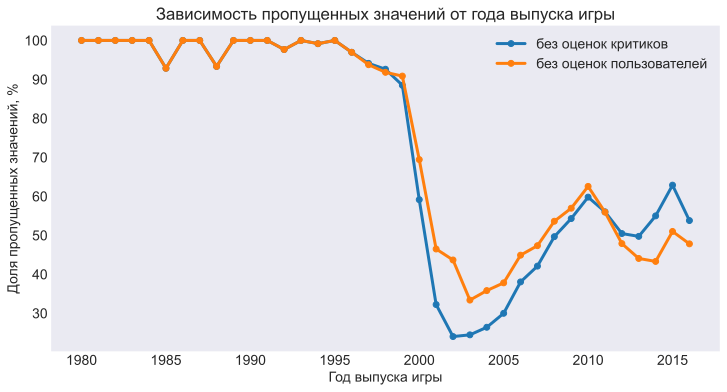

In [27]:
# посмотрим на зависимость пропущенных значений оценок критиков и оценок пользователей от года выпуска игры
fig, ax = plt.subplots()
ax.set(title = 'Зависимость пропущенных значений от года выпуска игры',
       xlabel = 'Год выпуска игры',
       ylabel = 'Доля пропущенных значений, %')
for column in games[['critic_score', 'user_score']]:
    a = nan_ratio(column, 'year_of_release')
    ax.plot(a.index, a,
            linewidth = 3,
            marker = 'o')
ax.grid = True
ax.legend(['без оценок критиков', 'без оценок пользователей'])
plt.show()

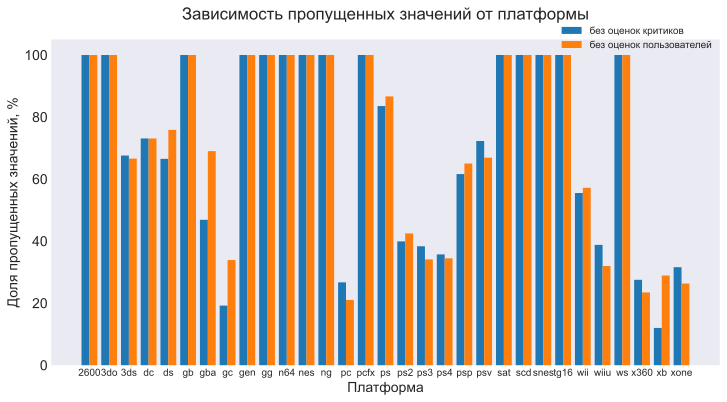

In [28]:
# посмотрим на зависимость пропущенных значений оценок критиков и оценок пользователей от платформы
fig, ax = plt.subplots()
plt.title('Зависимость пропущенных значений от платформы', pad = 20)
ax.set(xlabel = 'Платформа',
       ylabel = 'Доля пропущенных значений, %')
x = np.arange(1, 32) - 0.4
for column in games[['critic_score', 'user_score']]:
    a = nan_ratio(column, 'platform')
    ax.bar(x, a,
           width = 0.4)
    x = x + 0.4
ax.grid = True
ax.legend(['без оценок критиков', 'без оценок пользователей'],
          fontsize = 10,
          bbox_to_anchor = (0.75, 0.94))
plt.xticks(x - 0.6,
           a.index,
           fontsize = 10)
plt.show()

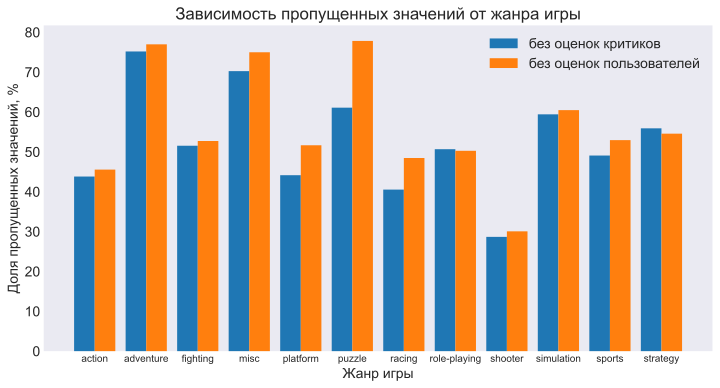

In [29]:
# посмотрим на зависимость пропущенных значений оценок критиков и оценок пользователей от жанра игры
fig, ax = plt.subplots()
ax.set(title = 'Зависимость пропущенных значений от жанра игры',
       xlabel = 'Жанр игры',
       ylabel = 'Доля пропущенных значений, %')
x = np.arange(1, 13) - 0.4
for column in games[['critic_score', 'user_score']]:
    a = nan_ratio(column, 'genre')
    ax.bar(x, a,
           width = 0.4)
    x = x + 0.4
ax.grid = True
ax.legend(['без оценок критиков', 'без оценок пользователей'])
plt.xticks(x - 0.6,
           a.index,
           fontsize = 10)
plt.show()

Количество игр без оценок критиков и оценок пользователей зависит и от года выпуска, и от платформы, и от жанра игры. Так, играм до 1995 года оценки практически не выставлялись, максимальное количество оценок играм выставлялось в начале 2000-х годов. Такая динамика может быть связана с тем, что игр стало выходить больше, в том числе на различных платформах, соответственно, у критиков и пользователей уменьшилась возможность оценить все игры. Зависимость от платформы напрямую связана с годом выпуска игры - на "старых" платформах оценок значительно меньше либо их нет вовсе. Зависимость же от жанра игры связана скорее всего с различным интересом критиков и пользователей к играм в разных жанрах. Кроме того, причина значительного количества пропусков в оценках критиков и пользователей может быть в том, что эти данные отсутствуют в открытом доступе. Мы не можем удалить строки с пропущенными значениями, так как потеряем большой объём данных. Заменить данные мы также не можем, так как оценка может иметь множество параметров, которые нам неизвестны. Восстанавливать значения по метрикам, группируя по названиям, годам выпуска, платформам или  жанрам игры, тоже нецелесообразно, поскольку даже одна и та же игра на разных платформах может иметь различные оценки. Принимаем решение оставить строки с пропущенными значениями оценок критиков и оценок пользователей.

Имеется большое количество пропущенных значений рейтинга от организации ESRB (6 699 или 40,4%). Чтобы понять причины такого большого количества пропущенных значений рассмотрим их зависимость от года выпуска, платформы и жанра игр.

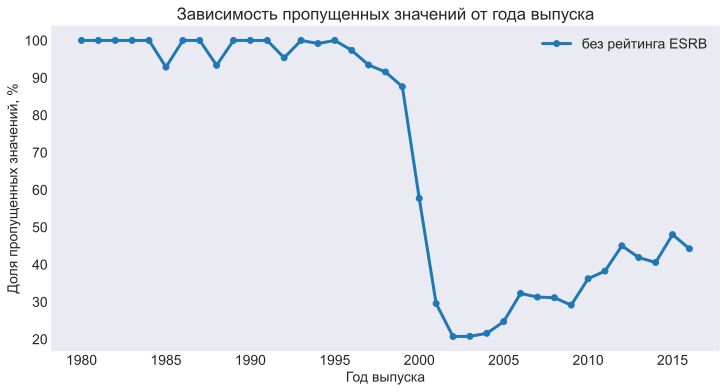

In [30]:
# посмотрим на зависимость пропущенных значений рейтинга от организации ESRB от года выпуска игры
fig, ax = plt.subplots()
ax.set(title = 'Зависимость пропущенных значений от года выпуска',
       xlabel = 'Год выпуска',
       ylabel = 'Доля пропущенных значений, %')
a = nan_ratio('rating', 'year_of_release')
ax.plot(a.index, a,
        linewidth = 3,
        marker = 'o')
ax.grid = True
ax.legend(['без рейтинга ESRB'])
plt.show()

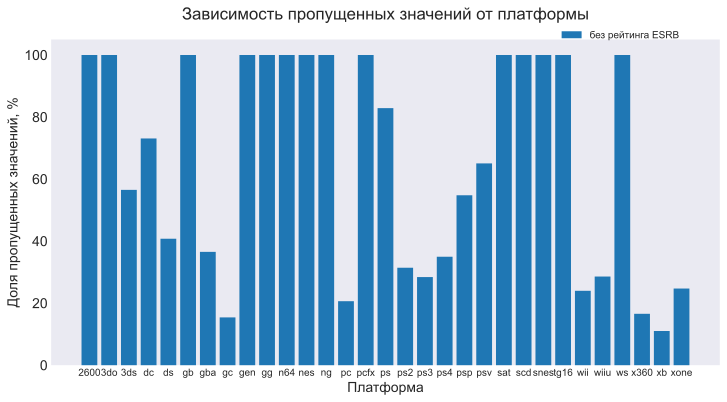

In [31]:
# посмотрим на зависимость пропущенных значений рейтинга от организации ESRB от платформы
fig, ax = plt.subplots()
plt.title('Зависимость пропущенных значений от платформы', pad = 20)
ax.set(xlabel = 'Платформа',
       ylabel = 'Доля пропущенных значений, %')
a = nan_ratio('rating', 'platform')
ax.bar(a.index, a)
ax.grid = True
ax.legend(['без рейтинга ESRB'],
          fontsize = 10,
          bbox_to_anchor = (0.75, 0.97))
plt.xticks(a.index,
           fontsize = 10)
plt.show()

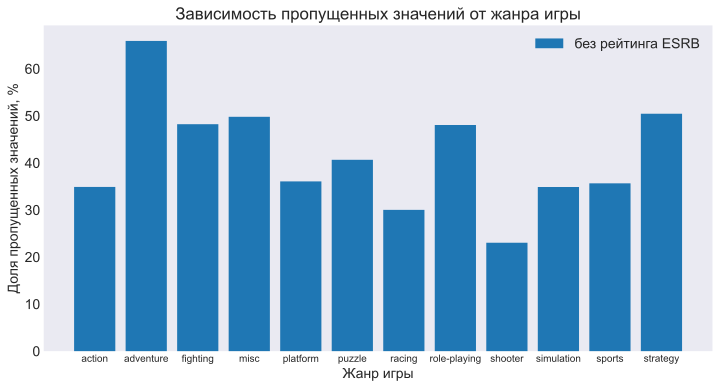

In [32]:
# посмотрим на зависимость пропущенных значений рейтинга от организации ESRB от жанра игры
fig, ax = plt.subplots()
ax.set(title = 'Зависимость пропущенных значений от жанра игры',
       xlabel = 'Жанр игры',
       ylabel = 'Доля пропущенных значений, %')
a = nan_ratio('rating', 'genre')
ax.bar(a.index, a)
ax.grid = True
ax.legend(['без рейтинга ESRB'])
plt.xticks(a.index,
           fontsize = 10)
plt.show()

Диаграммы зависимости пропущенных значений рейтинга от организации ESRB от года выпуска , платформы и жанра игры весьма похожи на аналогичные диаграммы зависимости пропущенных значений оценок критиков и пользователей, следовательно, и причины пропусков в данных могут быть теми же. Мы также не можем удалить строки с пропущенными значениями, так как потеряем большой объём данных.  Восстанавливать значения по метрикам, группируя по названиям, годам выпуска, платформам или  жанрам игры, тоже нецелесообразно, поскольку даже одна и та же игра на разных платформах может иметь различный рейтинг. [Заменить](https://www.esrb.org/) данные мы можем, однако обработка каждого пропущенного значения вручную будет весьма трудозатратна. Принимаем решение строки с пропущенными значениями рейтинга от организации ESRB заполнить значениями "no_rating".

In [33]:
# заполним пропущенные значения рейтинга от организации ESRB значениями "no_rating"
games['rating'] = games['rating'].fillna('no_rating')
games.head()

name platform  year_of_release         genre  na_sales  \
0                wii sports      wii           2006.0        sports     41.36   
1         super mario bros.      nes           1985.0      platform     29.08   
2            mario kart wii      wii           2008.0        racing     15.68   
3         wii sports resort      wii           2009.0        sports     15.61   
4  pokemon red/pokemon blue       gb           1996.0  role-playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score     rating  
0     28.96      3.77         8.45          76.0          8          e  
1      3.58      6.81         0.77           NaN        NaN  no_rating  
2     12.76      3.79         3.29          82.0        8.3          e  
3     10.93      3.28         2.95          80.0          8          e  
4      8.89     10.22         1.00           NaN        NaN  no_rating

In [34]:
# посмотрим на строки таблицы со значением рейтинга от организации ESRB "K-A"
games.query('rating == "k-a"')

name platform  year_of_release     genre  na_sales  \
654        theme hospital       pc           1997.0  strategy      2.30   
898    parappa the rapper       ps           1996.0      misc      0.26   
16533             worms 2       pc           1997.0  strategy      0.00   

       eu_sales  jp_sales  other_sales  critic_score user_score rating  
654        0.10      0.00         0.00           NaN          9    k-a  
898        0.16      1.46         0.03          92.0        7.4    k-a  
16533      0.01      0.00         0.00           NaN        8.1    k-a

In [35]:
# заменим значения рейтинга от организации ESRB "K-A" на значение «E»
games.loc[games['rating'] == 'k-a','rating'] = 'e'
games.query('rating == "k-a"')

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []

In [36]:
# посмотрим на строки таблицы со значением рейтинга от организации ESRB "RP"
games.query('rating == "rp"')

name platform  year_of_release     genre  \
14150            supreme ruler: cold war       pc           2011.0  strategy   
16037  wrc: fia world rally championship       pc           2005.0    racing   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
14150       0.0      0.03       0.0         0.01          63.0        6.8   
16037       0.0      0.01       0.0         0.00          65.0        NaN   

      rating  
14150     rp  
16037     rp

[Определим](https://www.esrb.org/) действительный рейтинг от организации ESRB для игр со значением рейтинга "RP".     

In [37]:
# заменим значения рейтинга от организации ESRB "RP" на действительный рейтинг
games.loc[14150,'rating'] = 'e10+'
games.loc[16037,'rating'] = 'e'
games.query('rating == "rp"')

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []

In [38]:
# приведем значения года выпуска к целому числу
games['year_of_release'] = games['year_of_release'].astype('int64')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16567 entries, 0 to 16566
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       7540 non-null   object 
 10  rating           16567 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [39]:
# приведем значения оценок пользователей к вещественному типу
games['user_score'] = games['user_score'].astype('float')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16567 entries, 0 to 16566
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       7540 non-null   float64
 10  rating           16567 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [40]:
# посчитаем количество дубликатов
games.duplicated().sum()

0

Предположим, что в таблице имеются строки с одинаковыми играми, платформами и годом выпуска.

In [41]:
# найдем строки с одинаковыми играми и платформами
games[games.duplicated(['name', 'platform'], keep = False)]

name platform  year_of_release     genre  \
603                  madden nfl 13      ps3             2012    sports   
1184   need for speed: most wanted     x360             2012    racing   
1582   need for speed: most wanted     x360             2005    racing   
1736            sonic the hedgehog      ps3             2006  platform   
4106            sonic the hedgehog      ps3             2006  platform   
5931   need for speed: most wanted       pc             2005    racing   
11624  need for speed: most wanted       pc             2012    racing   
16087                madden nfl 13      ps3             2012    sports   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
603        2.11      0.22      0.00         0.23          83.0         5.5   
1184       0.62      0.78      0.01         0.15          83.0         8.5   
1582       1.00      0.13      0.02         0.10          83.0         8.5   
1736       0.41      0.06      0.04         0.66          43.0         4.1   
4106       0.00      0.48      0.00         0.00          43.0         4.1   
5931       0.02      0.23      0.00         0.04          82.0         8.5   
11624      0.00      0.06      0.00         0.02          82.0         8.5   
16087      0.00      0.01      0.00         0.00          83.0         5.5   

      rating  
603        e  
1184       t  
1582       t  
1736    e10+  
4106    e10+  
5931       t  
11624      t  
16087      e

Имеется 2 игры, у которых совпадает все, кроме продаж в Европе, т.е. это дубликаты. Необходимо объединить отличающуюся информацию в одной строке, а затем ненужные строки удалить.

In [42]:
# объединим отличающуюся информацию в строках-дубликатах
games.loc[603,'eu_sales'] = games.loc[603,'eu_sales'] + games.loc[16087,'eu_sales']
games.loc[1736,'eu_sales'] = games.loc[1736,'eu_sales'] + games.loc[4106,'eu_sales']
games[games.duplicated(['name', 'platform'], keep = False)]

name platform  year_of_release     genre  \
603                  madden nfl 13      ps3             2012    sports   
1184   need for speed: most wanted     x360             2012    racing   
1582   need for speed: most wanted     x360             2005    racing   
1736            sonic the hedgehog      ps3             2006  platform   
4106            sonic the hedgehog      ps3             2006  platform   
5931   need for speed: most wanted       pc             2005    racing   
11624  need for speed: most wanted       pc             2012    racing   
16087                madden nfl 13      ps3             2012    sports   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
603        2.11      0.23      0.00         0.23          83.0         5.5   
1184       0.62      0.78      0.01         0.15          83.0         8.5   
1582       1.00      0.13      0.02         0.10          83.0         8.5   
1736       0.41      0.54      0.04         0.66          43.0         4.1   
4106       0.00      0.48      0.00         0.00          43.0         4.1   
5931       0.02      0.23      0.00         0.04          82.0         8.5   
11624      0.00      0.06      0.00         0.02          82.0         8.5   
16087      0.00      0.01      0.00         0.00          83.0         5.5   

      rating  
603        e  
1184       t  
1582       t  
1736    e10+  
4106    e10+  
5931       t  
11624      t  
16087      e

In [43]:
# удалим ненужные строки
games = games.drop(index = [4106, 16087]).reset_index(drop = True)
games[games.duplicated(['name', 'platform'], keep = False)]

name platform  year_of_release   genre  \
1184   need for speed: most wanted     x360             2012  racing   
1582   need for speed: most wanted     x360             2005  racing   
5930   need for speed: most wanted       pc             2005  racing   
11623  need for speed: most wanted       pc             2012  racing   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
1184       0.62      0.78      0.01         0.15          83.0         8.5   
1582       1.00      0.13      0.02         0.10          83.0         8.5   
5930       0.02      0.23      0.00         0.04          82.0         8.5   
11623      0.00      0.06      0.00         0.02          82.0         8.5   

      rating  
1184       t  
1582       t  
5930       t  
11623      t

In [44]:
# создадим столбец суммарных продаж по всем регионам
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

name platform  year_of_release         genre  na_sales  \
0                wii sports      wii             2006        sports     41.36   
1         super mario bros.      nes             1985      platform     29.08   
2            mario kart wii      wii             2008        racing     15.68   
3         wii sports resort      wii             2009        sports     15.61   
4  pokemon red/pokemon blue       gb             1996  role-playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score     rating  \
0     28.96      3.77         8.45          76.0         8.0          e   
1      3.58      6.81         0.77           NaN         NaN  no_rating   
2     12.76      3.79         3.29          82.0         8.3          e   
3     10.93      3.28         2.95          80.0         8.0          e   
4      8.89     10.22         1.00           NaN         NaN  no_rating   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38

### Вывод

В целях предобработки и подготовки данных провели следующую работу:  
1. Названия всех столбцов привели к нижнему регистру.   
2. Значения в столбцах `Name`, `Platform`, `Genre` и `Rating` привели к нижнему регистру.   
3. В столбце `Name` имелось 2 строки с пропущенными значениями названия игры, при этом обе эти игры вышли в 1993 году. Названия этих игр восстановить невозможно, поэтому строки с этими играми удалили. Одновременно исчезли пропущенные значения в столбце `Genre`, так как пропущенные значения в нем совпадали с аналогичными в столбце `Name`. 
4. Часть пропущенных значений (123) в столбце `Year_of_Release` заменили на значения года выпуска тех же игр с других платформ. Оставшиеся пропущенные значения года выпуска восстановить невозможно, их количество небольшое (146), поэтому строки с этими значениями удалили.   
5. Значения оценок пользователей "tbd" (to be determined) означают, что оценка будет определена позже, т.е. эти значения аналогичны пропущенным значениям, так как это оценки, которых нет на момент выгрузки данных. Следовательно, такие значения заменили на пропущенные.    
6. В столбцах `Critic_Score` и `User_Score` имелось значительное количество строк с пропущенными значениями оценок критиков и оценок пользователей. Количество игр без оценок критиков и оценок пользователей зависит и от года выпуска, и от платформы, и от жанра игры. Зависимость от года выпуска может быть связана с тем, что игр стало выходить больше, в том числе на различных платформах, соответственно, у критиков и пользователей уменьшилась возможность оценить все игры. Зависимость от платформы напрямую связана с годом выпуска игры - на "старых" платформах оценок значительно меньше либо их нет вовсе. Зависимость же от жанра игры связана скорее всего с различным интересом критиков и пользователей к играм в разных жанрах. Кроме того, причина значительного количества пропусков в оценках критиков и пользователей может быть в том, что эти данные отсутствуют в открытом доступе. Мы не могли удалить строки с пропущенными значениями, так как потеряли бы большой объём данных. Заменить данные мы также не могли, так как оценка может иметь множество параметров, которые нам неизвестны. Восстанавливать значения по метрикам, группируя по названиям, годам выпуска, платформам или  жанрам игры, тоже было нецелесообразно, поскольку даже одна и та же игра на разных платформах может иметь различные оценки. По указанным причинам оставили строки с пропущенными значениями оценок критиков и оценок пользователей. 
7. В столбце `Rating` имелось значительное количество строк с пропущенными значениями рейтинга от организации ESRB. Причины наличия пропусков такие же, как и для пропущенных значений оценок критиков и  пользователей. Мы также не могли удалить строки с пропущенными значениями, так как потеряли бы большой объём данных. Восстанавливать значения по метрикам, группируя по названиям, годам выпуска, платформам или жанрам игры, тоже было нецелесообразно, поскольку даже одна и та же игра на разных платформах может иметь различный рейтинг. [Заменить](https://www.esrb.org/) данные мы могли, однако обработка каждого пропущенного значения вручную весьма трудозатратна. По указанным причинам строки с пропущенными значениями рейтинга от организации ESRB заполнили значениями "no_rating".
8. Так как рейтинг от организации ESRB "K-A" в настоящее время соответствует значению «E», произвели соответствующую замену значений.   
9. [Нашли](https://www.esrb.org/) в открытых источниках действительный рейтинг от организации ESRB игр с рейтингом «RP», произвели соответствующую замену значений.   
10. Значения в столбце `Year_of_Release` привели к целому числу, так как это значения года.   
11. Значения в столбце `User_Score` привели к вещественному типу, так как оценки пользователей - это числа с одним знаком после запятой.  
12. Дубликаты в анализируемых данных отсутствуют, однако имелось 2 строки, у которых совпадало все, кроме продаж в Европе, т.е. фактически - это дубликаты. Отличающуюся информацию объединили в одной строке, а затем ненужные строки удалили.
13. Для дальнейшего анализа создали столбец суммарных продаж по всем регионам.


### Анализ данных
<a name="analysis"></a>

#### Количество выходящих игр  и суммарные продажи по годам

In [45]:
# создадим таблицу с количеством игр, уникальных игр, доли уникальных игр, суммарных продаж и
# средних продаж одной игры по годам их выпуска
games_year = games.pivot_table(index = 'year_of_release',
                               values = ['name', 'total_sales'],
                               aggfunc = {'name' : ('count', pd.Series.nunique), 'total_sales' : 'sum'})\
                  .rename(columns = {'count' : 'number_of_games',
                                     'nunique' : 'number_of_games_unique',
                                     'sum' : 'total_sales_year'})
games_year.columns = games_year.columns.droplevel(0)
games_year['ratio_games_unique'] = (games_year['number_of_games_unique'] / games_year['number_of_games'] * 100).round(1)
games_year['thousands_of_copies_per_game'] = (games_year['total_sales_year'] / games_year['number_of_games'] * 1000).round(1)
games_year = games_year.reset_index()
games_year

year_of_release  number_of_games  number_of_games_unique  \
0              1980                9                       9   
1              1981               46                      46   
2              1982               36                      36   
3              1983               17                      17   
4              1984               14                      14   
5              1985               14                      14   
6              1986               21                      21   
7              1987               16                      16   
8              1988               15                      15   
9              1989               17                      17   
10             1990               16                      16   
11             1991               41                      40   
12             1992               43                      41   
13             1993               60                      59   
14             1994              121                     117   
15             1995              219                     215   
16             1996              263                     258   
17             1997              289                     282   
18             1998              379                     364   
19             1999              339                     326   
20             2000              350                     325   
21             2001              484                     428   
22             2002              845                     631   
23             2003              785                     546   
24             2004              765                     550   
25             2005              947                     657   
26             2006             1019                     773   
27             2007             1202                     884   
28             2008             1440                    1039   
29             2009             1431                    1001   
30             2010             1271                     900   
31             2011             1153                     779   
32             2012              661                     446   
33             2013              547                     335   
34             2014              582                     319   
35             2015              606                     362   
36             2016              502                     297   

    total_sales_year  ratio_games_unique  thousands_of_copies_per_game  
0              11.38               100.0                        1264.4  
1              35.68               100.0                         775.7  
2              28.88               100.0                         802.2  
3              16.80               100.0                         988.2  
4              50.35               100.0                        3596.4  
5              53.95               100.0                        3853.6  
6              37.08               100.0                        1765.7  
7              21.70               100.0                        1356.2  
8              47.21               100.0                        3147.3  
9              73.45               100.0                        4320.6  
10             49.37               100.0                        3085.6  
11             32.23                97.6                         786.1  
12             76.16                95.3                        1771.2  
13             45.99                98.3                         766.5  
14             79.23                96.7                         654.8  
15             88.12                98.2                         402.4  
16            199.15                98.1                         757.2  
17            201.07                97.6                         695.7  
18            256.31                96.0                         676.3  
19            251.25                96.2                         741.2  
20            201.66                92

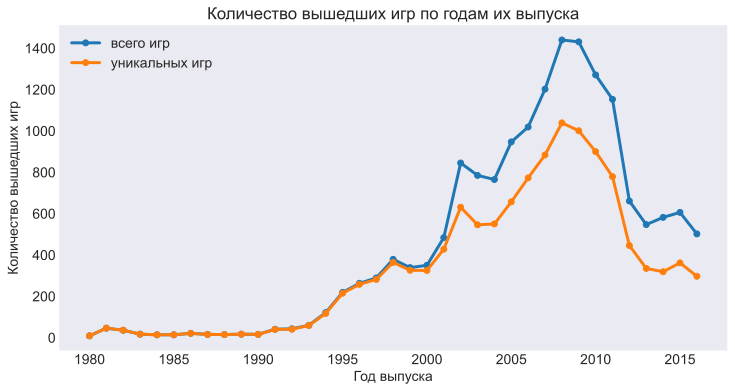

In [46]:
# посмотрим динамику выхода игр по годам 
fig, ax = plt.subplots()
ax.set(title = 'Количество вышедших игр по годам их выпуска',
       xlabel = 'Год выпуска',
       ylabel = 'Количество вышедших игр')
for column in games_year[['number_of_games', 'number_of_games_unique']]:
    ax.plot(games_year['year_of_release'],
            games_year[column],
            linewidth = 3,
            marker = 'o')
ax.legend(['всего игр', 'уникальных игр'])
ax.grid = True
plt.show()

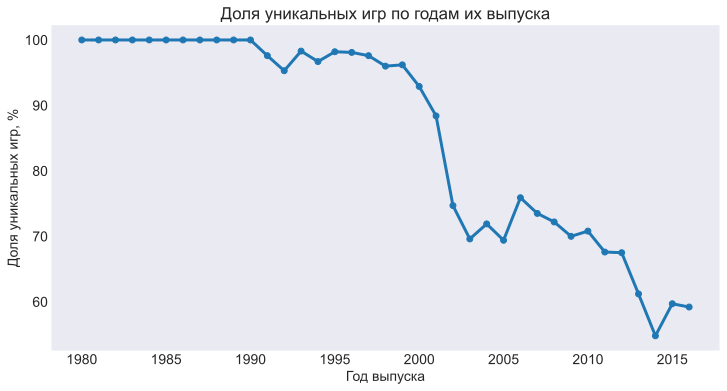

In [47]:
# посмотрим динамику доли уникальных игр по годам их выпуска
fig, ax = plt.subplots()
ax.set(title = 'Доля уникальных игр по годам их выпуска',
       xlabel = 'Год выпуска',
       ylabel = 'Доля уникальных игр, %')
ax.plot(games_year['year_of_release'],
        games_year['ratio_games_unique'],
        linewidth = 3,
        marker = 'o')
ax.grid = True
plt.show()

In [48]:
# определим долю и суммарные продажи игр, вышедших до 1994 года
((games_year.query('year_of_release <= 1993')['number_of_games_unique'].sum()\
/ games_year['number_of_games_unique'].sum()* 100).round(1),
(games_year.query('year_of_release <= 1993')['total_sales_year'].sum()\
/ games_year['total_sales_year'].sum()* 100).round(1))

(3.0, 6.5)

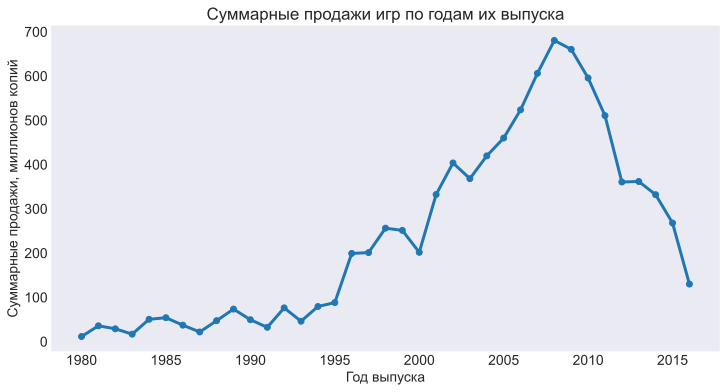

In [49]:
# посмотрим динамику суммарных продаж игр по годам 
fig, ax = plt.subplots()
ax.set(title = 'Суммарные продажи игр по годам их выпуска',
       xlabel = 'Год выпуска',
       ylabel = 'Суммарные продажи, миллионов копий')
ax.plot(games_year['year_of_release'],
        games_year['total_sales_year'],
        linewidth = 3,
        marker = 'o')
ax.grid = True
plt.show()

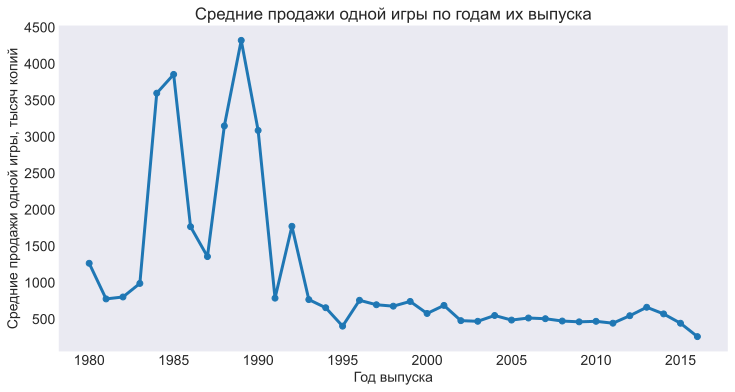

In [50]:
# посмотрим динамику средних продаж одной игры по годам их выпуска
fig, ax = plt.subplots()
ax.set(title = 'Средние продажи одной игры по годам их выпуска',
       xlabel = 'Год выпуска',
       ylabel = 'Средние продажи одной игры, тысяч копий')
ax.plot(games_year['year_of_release'],
        games_year['thousands_of_copies_per_game'],
        linewidth = 3,
        marker = 'o')
ax.grid = True
plt.show()

В период с 1980 по 1990 годы игр выпускалось очень мало, однако все они являлись уникальными, т.е. выходили только на одной платформе. Суммарные продажи игр тоже были незначительны, однако, учитывая небольшое количество игр, среднее количество проданных копий одной игры было большим, т.е. каждая игра в этот период была незаурядной. С 1990 по 2000 годы игр стало выпускаться больше, при этом доля уникальных игр продолжала оставаться достаточно высокой, а суммарные продажи начали расти. Период с 2000 по 2010 годы - расцвет рынка видеоигр, разнообразие, а также суммарные продажи которого, достигли своего пика в 2008 году. Доля же уникальных игр в этот период значительно снизилась (с 92,9% до 70,8%). Период после 2010 года характерен резким снижением количества выпускаемых игр, в том числе уникальных (их количество вернулось к уровню конца 1990-х годов), сместив приоритеты к выпуску игр на разных платформах (к середине 2010-х годов доля уникальных игр уменьшилась до 55 - 60%). В это же время также резко упали суммарные продажи, хотя средние продажи одной игры оставались на одном уровне.  Падение рынка видеоигр привело к тому, что суммарные продажи в 2015 году снизились до уровня начала 2000-х годов.  
Кроме того, необходимо отметить, что рынок видеоигр до 1994 года находился в зачаточном состоянии. На этот период приходится всего 3% уникальных игр (6,5% суммарных продаж), информацией о которых мы владеем.

#### Суммарные продажи по платформам

In [51]:
# создадим таблицу с суммарными продажами по платформам
sales_platform = games.pivot_table(index = 'platform',
                                   values = 'total_sales',
                                   aggfunc = 'sum')\
                      .sort_values(by = 'total_sales',\
                                   ascending = False)\
                      .reset_index()
sales_platform

platform  total_sales
0       ps2      1247.16
1      x360       966.61
2       ps3       935.19
3       wii       903.31
4        ds       804.28
5        ps       727.58
6       ps4       314.14
7       gba       313.73
8       psp       293.57
9        pc       258.86
10      3ds       258.53
11       xb       256.69
12       gb       254.43
13      nes       251.05
14      n64       218.48
15     snes       200.04
16       gc       198.66
17     xone       159.32
18     2600        89.01
19     wiiu        82.19
20      psv        53.81
21      sat        33.59
22      gen        28.35
23       dc        15.95
24      scd         1.86
25       ng         1.44
26       ws         1.42
27     tg16         0.16
28      3do         0.10
29       gg         0.04
30     pcfx         0.03

Имеется 6 платформ, на которых суммарные продажи превышают 700 миллионов копий.

In [52]:
# выделим платформы с наибольшими суммарными продажами
sales_platform = sales_platform.head(6)
sales_platform

platform  total_sales
0      ps2      1247.16
1     x360       966.61
2      ps3       935.19
3      wii       903.31
4       ds       804.28
5       ps       727.58

In [53]:
# создадим список из наиболее популярных платформ
top_sales_platform = sales_platform.reset_index().platform.to_list()
top_sales_platform

['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps']

In [54]:
# создадим таблицу с суммарными продажами по наиболее популярным платформам по годам
sales_platform_popular_year = games.loc[games['platform'].isin(top_sales_platform)]\
                                   .pivot_table(index = ['platform', 'year_of_release'],
                                                values = 'total_sales',
                                                aggfunc = 'sum')\
                                   .reset_index()
sales_platform_popular_year              

platform  year_of_release  total_sales
0        ds             1985         0.02
1        ds             2004        17.27
2        ds             2005       130.14
3        ds             2006       119.81
4        ds             2007       147.23
..      ...              ...          ...
63     x360             2012       100.72
64     x360             2013        88.58
65     x360             2014        34.74
66     x360             2015        11.96
67     x360             2016         1.52

[68 rows x 3 columns]

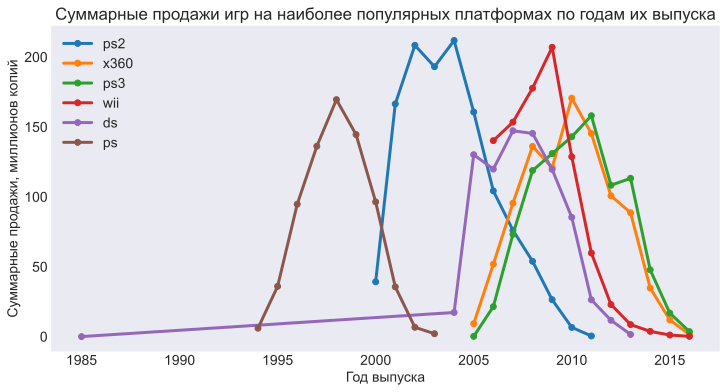

In [55]:
# посмотрим динамику суммарных продаж на наиболее популярных платформах по годам
fig, ax = plt.subplots()
ax.set(title = 'Суммарные продажи игр на наиболее популярных платформах по годам их выпуска',
       xlabel = 'Год выпуска',
       ylabel = 'Суммарные продажи, миллионов копий')
for element in top_sales_platform:
    a = sales_platform_popular_year.query('platform == @element')
    ax.plot(a['year_of_release'],
            a['total_sales'],
            linewidth = 3,
            marker = 'o',
            label = element)
ax.legend(loc = 2)
ax.grid = True
plt.show()

В разные годы были популярны игры на разных платформах. Игры на платформе "PlayStation" компании "Sony" начали выходить в 1994 году, достигли пика продаж в 1998 году и "умерли" в 2003 году. На смену этой платформе в 2000 году пришли игры на платформе "PlayStation 2", которая достаточно долго (с 2001 по 2005 годы) лидировала на рынке видеоигр и стала самой продаваемой за всю историю. 2004 - 2005 годы - период появления других конкурентноспособных платформ, приведших к серьезным изменениям на рынке. "PlayStation 3", пришедшая на смену "PlayStation 2", уже не смогла достичь уровня предшественника ввиду появления высокой конкуренции. Значительную долю на рынке в это время заняли платформы компании "Nintendo" - "DS", достигшая пика популярности в 2007 году, и  "Wii", пришедшая к своему максимуму в 2009 году. Игры на платформе "PlayStation 3" продавались в одно время с играми на платформе "Xbox 360" компании "Microsoft ", оттянув на себя значительную часть рынка видеоигр. Пика эти платформы достигли в 2010 - 2011 годах.    
Примерный срок "жизни" платформы составляет около 10 лет, при этом каждая платформа достигает своего максимума к середине этого периода. После этого наблюдается резкое падение продаж и платформа постепенно теряет свою актуальность.

Исходя из анализа количества выпущенных игр по годам и продаж по платформам следует, что период до 1994 года не является актуальным для дальнейшего исследования. До 1994 года выходило мало игр, при этом все игры выходили только на одной платформе. Более того, только в последние 10 лет к большому количеству выпускаемых игр добавилось разнообразие конкурирующих между собой платформ. Кроме того срок "жизни" популярной платформы составляет около 10 лет. Таким образом, учитывая изложенное, а также то, что имеющиеся данные за 2016 год неполные, будем считать перид с 2006 года по 2015 год актуальным для дальнейшего исследования.   
Тем не менее, следует учитывать, что каждая платформа достигает своего максимума к середине своей "жизни", для исследования нужны платформы, которые находятся на подъеме, а значит стоит рассматривать период равный примерно половине жизненного цикла платформы. В ином случае при анализе нам будут мешать платформы, которые были популярны в прошлые годы, но уже находятся на спаде, и выпуск которых скоро прекратится.

#### Суммарные продажи по платформам за актуальный период

In [56]:
# выделим в таблицу данные за актуальный период
games_actual = games.query('year_of_release >= 2006 & year_of_release <= 2015')
games_actual.head()

name platform  year_of_release     genre  na_sales  \
0             wii sports      wii             2006    sports     41.36   
2         mario kart wii      wii             2008    racing     15.68   
3      wii sports resort      wii             2009    sports     15.61   
6  new super mario bros.       ds             2006  platform     11.28   
7               wii play      wii             2006      misc     13.96   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      e   
2     12.76      3.79         3.29          82.0         8.3      e   
3     10.93      3.28         2.95          80.0         8.0      e   
6      9.14      6.50         2.88          89.0         8.5      e   
7      9.18      2.93         2.84          58.0         6.6      e   

   total_sales  
0        82.54  
2        35.52  
3        32.77  
6        29.80  
7        28.91

In [57]:
# посчитаем суммарные продажи
games_actual['total_sales'].sum()

4898.92

In [58]:
# создадим таблицу с суммарными продажами по платформам за актуальный период
sales_platform_actual = games_actual.pivot_table(index = 'platform',
                                                 columns = 'year_of_release',
                                                 values = 'total_sales',
                                                 aggfunc = 'sum')
sales_platform_actual

year_of_release    2006    2007    2008    2009    2010    2011    2012  \
platform                                                                  
3ds                 NaN     NaN     NaN     NaN    0.32   63.20   51.76   
dc                  NaN    0.02    0.04     NaN     NaN     NaN     NaN   
ds               119.81  147.23  145.36  119.56   85.35   26.33   11.67   
gba                5.46    3.40     NaN     NaN     NaN     NaN     NaN   
gc                11.55    0.27     NaN     NaN     NaN     NaN     NaN   
pc                 2.85    9.28   12.46   17.05   26.15   35.16   23.45   
ps2              104.24   76.10   53.90   26.40    6.59    0.45     NaN   
ps3               21.44   73.19  118.79  130.93  142.96  157.98  108.28   
ps4                 NaN     NaN     NaN     NaN     NaN     NaN     NaN   
psp               56.28   47.30   35.96   38.58   35.04   17.82    7.95   
psv                 NaN     NaN     NaN     NaN     NaN    4.63   16.19   
wii              140.19  153.41  177.68  206.97  128.67   59.79   22.94   
wiiu                NaN     NaN     NaN     NaN     NaN     NaN   17.56   
x360              51.79   95.41  136.07  120.82  170.55  145.23  100.72   
xb                10.04    0.55    0.18     NaN     NaN     NaN     NaN   
xone                NaN     NaN     NaN     NaN     NaN     NaN     NaN   

year_of_release    2013    2014    2015  
platform                                 
3ds               56.57   43.76   27.78  
dc                  NaN     NaN     NaN  
ds                 1.54     NaN     NaN  
gba                 NaN     NaN     NaN  
gc                  NaN     NaN     NaN  
pc                12.66   13.63    8.52  
ps2                 NaN     NaN     NaN  
ps3              113.25   47.76   16.82  
ps4               25.99  100.00  118.90  
psp                3.38    0.24    0.12  
psv               10.59   11.90    6.25  
wii                8.59    3.75    1.14  
wiiu              21.65   22.03   16.35  
x360              88.58   34.74   11.96  
xb                  NaN     NaN     NaN  
xone              18.96   54.07   60.14

In [59]:
# проверим суммарные продажи
sales_platform_actual.sum().sum()

4898.920000000003

Платформы, которые действовали до 2007 года, к 2017 году будут находиться на спаде, а платформы, которые отсутствовали в 2015 году, уже не выпускаются.

In [60]:
# удалим строки с платфомами, действовавшими в 2006 году или отсутствовавшими в 2015 году
sales_platform_actual = sales_platform_actual.loc[sales_platform_actual[2006].isnull()]
sales_platform_actual.dropna(subset = [2015],
                             inplace = True)
sales_platform_actual

year_of_release  2006  2007  2008  2009  2010   2011   2012   2013    2014  \
platform                                                                     
3ds               NaN   NaN   NaN   NaN  0.32  63.20  51.76  56.57   43.76   
ps4               NaN   NaN   NaN   NaN   NaN    NaN    NaN  25.99  100.00   
psv               NaN   NaN   NaN   NaN   NaN   4.63  16.19  10.59   11.90   
wiiu              NaN   NaN   NaN   NaN   NaN    NaN  17.56  21.65   22.03   
xone              NaN   NaN   NaN   NaN   NaN    NaN    NaN  18.96   54.07   

year_of_release    2015  
platform                 
3ds               27.78  
ps4              118.90  
psv                6.25  
wiiu              16.35  
xone              60.14

In [61]:
# удалим неинформативные столбцы
sales_platform_actual.drop([2006, 2007, 2008, 2009, 2010],
                           axis = 'columns',
                           inplace = True)
sales_platform_actual

year_of_release   2011   2012   2013    2014    2015
platform                                            
3ds              63.20  51.76  56.57   43.76   27.78
ps4                NaN    NaN  25.99  100.00  118.90
psv               4.63  16.19  10.59   11.90    6.25
wiiu               NaN  17.56  21.65   22.03   16.35
xone               NaN    NaN  18.96   54.07   60.14

Таким образом, мы выбрали 5 перспективных платформ, которые будут актуальны в 2017 году.

#### Суммарные продажи по перспективным платформам

In [62]:
# создадим списки из перспективных платформ и актуальных лет
platform_prospective = sales_platform_actual.reset_index().platform.to_list()
year_of_release_actual = sales_platform_actual.columns.to_list()
(platform_prospective, year_of_release_actual)

(['3ds', 'ps4', 'psv', 'wiiu', 'xone'], [2011, 2012, 2013, 2014, 2015])

In [63]:
# создадим таблицу с суммарными продажами по перспективным платформам за актуальный период
sales_platform_prospective_year = games_actual.loc[games['platform'].isin(platform_prospective)\
                                  & games['year_of_release'].isin(year_of_release_actual)]\
                                              .pivot_table(index = ['platform', 'year_of_release'],
                                                           values = 'total_sales',
                                                           aggfunc = 'sum')\
                                              .reset_index()
sales_platform_prospective_year

platform  year_of_release  total_sales
0       3ds             2011        63.20
1       3ds             2012        51.76
2       3ds             2013        56.57
3       3ds             2014        43.76
4       3ds             2015        27.78
5       ps4             2013        25.99
6       ps4             2014       100.00
7       ps4             2015       118.90
8       psv             2011         4.63
9       psv             2012        16.19
10      psv             2013        10.59
11      psv             2014        11.90
12      psv             2015         6.25
13     wiiu             2012        17.56
14     wiiu             2013        21.65
15     wiiu             2014        22.03
16     wiiu             2015        16.35
17     xone             2013        18.96
18     xone             2014        54.07
19     xone             2015        60.14

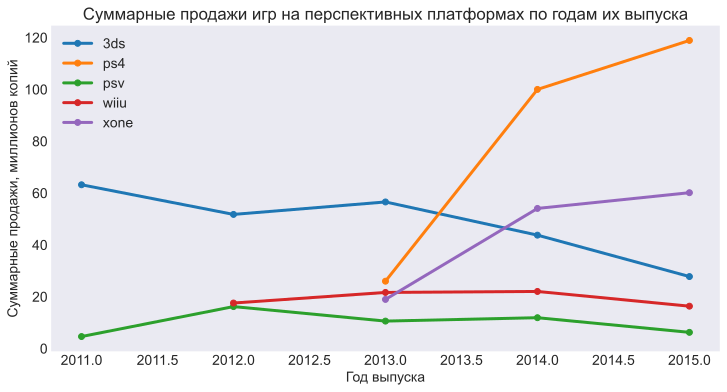

In [64]:
# посмотрим динамику суммарных продаж на перспективных платформах по годам
fig, ax = plt.subplots()
ax.set(title = 'Суммарные продажи игр на перспективных платформах по годам их выпуска',
       xlabel = 'Год выпуска',
       ylabel = 'Суммарные продажи, миллионов копий')
for element in platform_prospective:
    a = sales_platform_prospective_year.query('platform == @element')
    ax.plot(a['year_of_release'],
            a['total_sales'],
            linewidth = 3,
            marker = 'o',
            label = element)
ax.legend()
ax.grid = True
plt.show()

Таким образом, потенциально прибыльные в 2017 году платформы:   
* "3DS" компании "Nintendo", которая уже несколько лет пользуется популярностью у пользователей;    
* "Playstation 4" компании "Sony", которая была выпущена недавно и уже приносит самый высокий доход от продаж;  
* "PlayStation Vita" также компании "Sony", которая не настолько популярна, что скорее всего связано с меньшим количеством игр на данной платформе, но также потенциально прибыльная в ближайшие 2-3 года;    
* "Wii U" компании "Nintendo", которая является преемником достаточно популярной ранее платформы "Wii";   
* "Xbox One" компании "Microsoft", которая является преемником платформы "Xbox 360" и способна составить конкуренцию "Playstation 4".    

Рост популярности пользователей наблюдается у платформ, выпущенных недавно: "Playstation 4" и "Xbox One".  На остальных перспективных платформах спрос на игры снижается, тем не менее, даже они потенциально могут принести прибыль в ближайшие несколько лет.

In [65]:
# выделим в таблицу данные по перспективным платформам
games_platform_prospective = games_actual.loc[games_actual['platform'].isin(platform_prospective)]\
                                         .reset_index()
games_platform_prospective.head()

index                                       name platform  year_of_release  \
0     31                  call of duty: black ops 3      ps4             2015   
1     33                        pokemon x/pokemon y      3ds             2013   
2     40                               mario kart 7      3ds             2011   
3     42                         grand theft auto v      ps4             2014   
4     47  pokemon omega ruby/pokemon alpha sapphire      3ds             2014   

          genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
0       shooter      6.03      5.86      0.36         2.38           NaN   
1  role-playing      5.28      4.19      4.35         0.78           NaN   
2        racing      5.03      4.02      2.69         0.91          85.0   
3        action      3.96      6.31      0.38         1.97          97.0   
4  role-playing      4.35      3.49      3.10         0.74           NaN   

   user_score     rating  total_sales  
0         NaN  no_rating        14.63  
1         NaN  no_rating        14.60  
2         8.2          e        12.65  
3         8.3          m        12.62  
4         NaN  no_rating        11.68

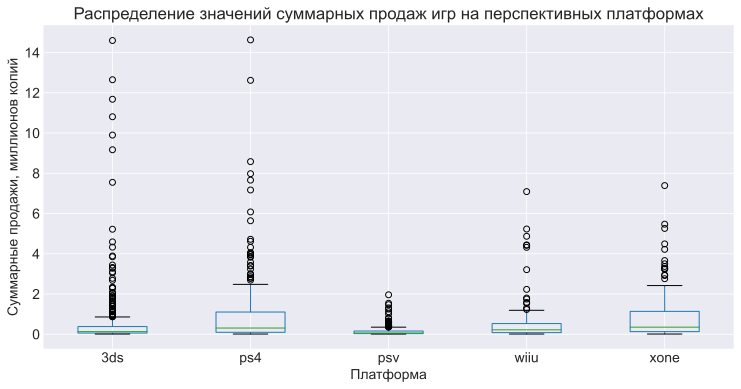

In [66]:
# посмотрим на распределение значений суммарных продаж игр на перспективных платформах
games_platform_prospective.boxplot('total_sales',
                                   by = 'platform')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи, миллионов копий')
plt.title('Распределение значений суммарных продаж игр на перспективных платформах')
plt.suptitle('')
plt.show()

На каждой из платформ существует определенное количество игр, суммарные продажи по которым выбиваются за пределы 1,5 межквартильных размахов. Так, на платформе "3DS" самое большое количество выбивающихся значений, при этом при достаточно небольшом медианном значении суммарных продаж по сравнению с другими платформами, имеются игры, которых продается больше, чем на других платформах.      
Вместе с тем, учитывая, насколько медиана на всех платформах не стремится к длинному хвосту высоких значений, значения, которые отсёк верхний «ус» - достаточно редкие.

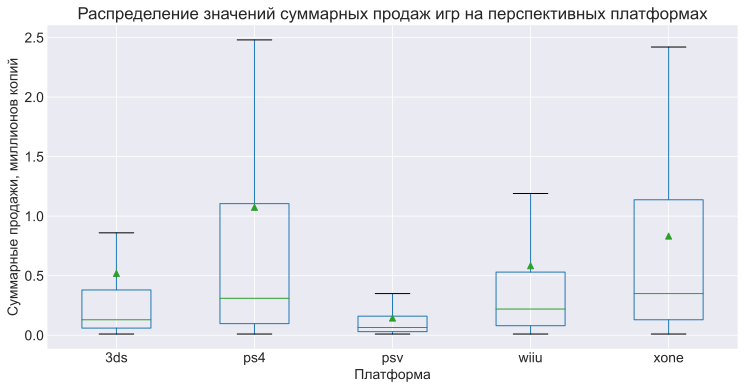

In [67]:
# посмотрим на распределение значений суммарных продаж игр на перспективных платформах без выбросов
games_platform_prospective.boxplot('total_sales',
                                   by = 'platform',
                                   showfliers = False,
                                   showmeans = True)
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи, миллионов копий')
plt.title('Распределение значений суммарных продаж игр на перспективных платформах')
plt.suptitle('')
plt.show()

По всем платформам наблюдается превышение среднего арифметического значения над медианным и скос распределения данных вправо (наиболее сильный для "Playstation 4" и "Xbox One"), что свидетельствует о значительном количестве игр с небольшими суммарными продажами. Распределения продаж на самых прибыльных платформах "Playstation 4" и "Xbox One" очень похожи, однако среднее арифметическое значение на платформе "Xbox One" значительно ближе к медианному, что говорит о меньшем количестве выбивающихся значений на этой платформе.



#### Зависимость суммарных продаж по платформам от оценок критиков и пользователей

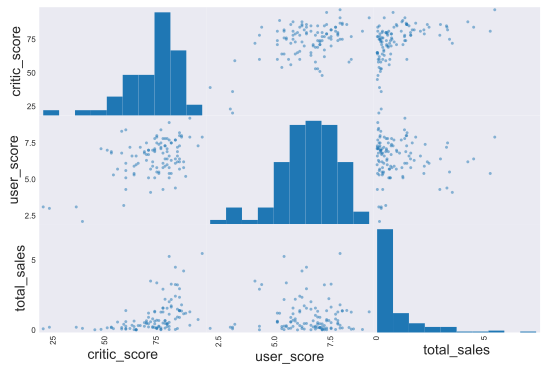

In [68]:
# построим матрицу рассеяния по значениям суммарных продаж, оценок критиков и оценок пользователей на платформе "Xbox One"
pd.plotting.scatter_matrix(games_platform_prospective.query('platform == "xone"')\
                           [['critic_score', 'user_score', 'total_sales']],
                           figsize = (9, 6))
plt.show()

In [69]:
# рассчитаем коэффициенты корреляции значений суммарных продаж, оценок критиков и оценок пользователей на платформе "Xbox One"
corr = games_platform_prospective.query('platform == "xone"')\
       [['critic_score', 'user_score', 'total_sales']].corr().round(2)
corr.style.background_gradient(cmap = 'coolwarm')

Исходя из построенной матрицы рассеяния и рассчитанных коэффициентов корреляции, зависимость суммарных продаж от оценок критиков на платформе "Xbox One" прямая, но слабая, а от оценок пользователей отсутствует.

Платформа 3ds


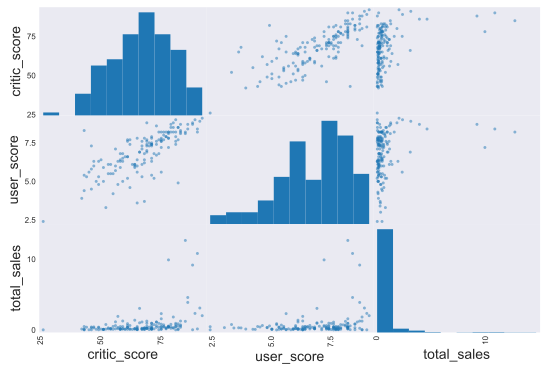

Платформа ps4


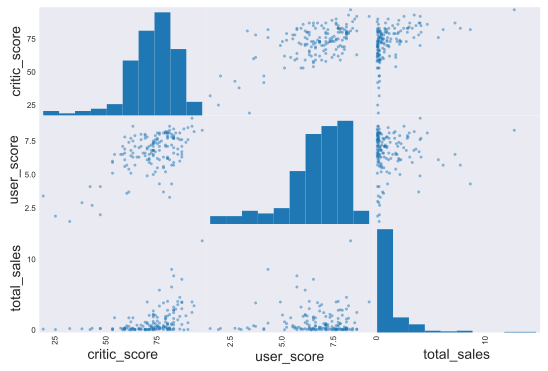

Платформа psv


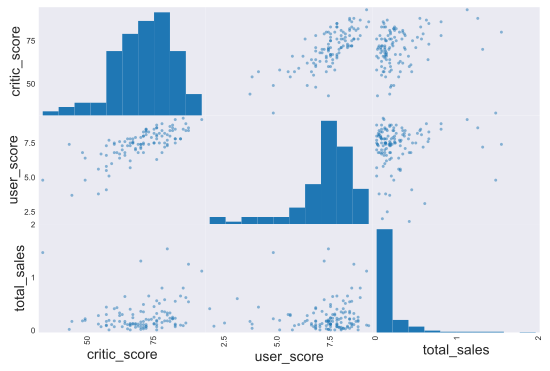

Платформа wiiu


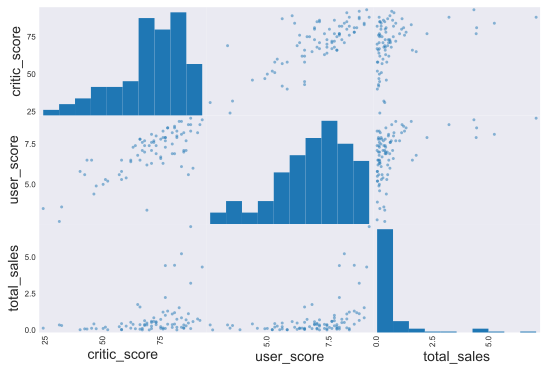

In [70]:
# построим матрицы рассеяния по значениям суммарных продаж, оценок критиков и оценок пользователей
# на остальных перспективных платформах
for element in platform_prospective[:4]:
    print('Платформа', element)
    pd.plotting.scatter_matrix(games_platform_prospective.query('platform == @element')\
                               [['critic_score', 'user_score', 'total_sales']],
                               figsize = (9, 6))
    plt.show()

In [71]:
InteractiveShell.ast_node_interactivity = "all"

In [72]:
# рассчитаем коэффициенты корреляции значений суммарных продаж, оценок критиков и оценок пользователей
# на остальных перспективных платформах
for element in platform_prospective[:4]:
    print('Платформа', element)
    corr = games_platform_prospective.query('platform == @element')\
           [['critic_score', 'user_score', 'total_sales']].corr().round(2)
    corr.style.background_gradient(cmap = 'coolwarm')
    print()
    

Платформа 3ds



Платформа ps4



Платформа psv



Платформа wiiu


Исходя из построенных матриц рассеяния и рассчитанных коэффициентов корреляции, зависимость суммарных продаж от оценок критиков на остальных перспективных платформах (за исключением "PlayStation Vita") также прямая, но слабая, а на платформе  "PlayStation Vita" прямая и очень слабая. Зависимость же суммарных продаж от оценок пользователей имеется на платформах "3DS" и "Wii U" (прямая и слабая).

In [73]:
InteractiveShell.ast_node_interactivity = "last_expr"

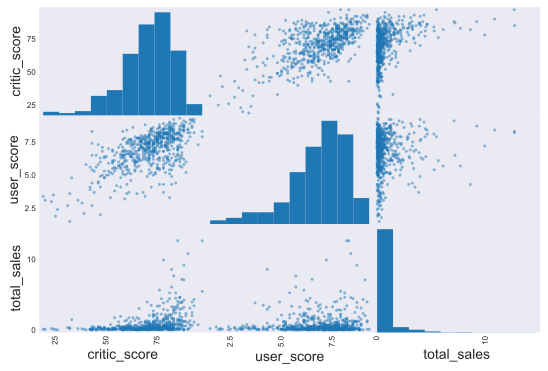

In [74]:
# построим матрицу рассеяния по значениям суммарных продаж, оценок критиков и оценок пользователей
# на всех перспективных платформах
pd.plotting.scatter_matrix(games_platform_prospective[['critic_score', 'user_score', 'total_sales']],
                           figsize = (9, 6))
plt.show()

In [75]:
# рассчитаем коэффициенты корреляции значений суммарных продаж, оценок критиков и оценок пользователей
# на всех перспективных платформах
corr = games_platform_prospective[['critic_score', 'user_score', 'total_sales']].corr().round(2)
corr.style.background_gradient(cmap = 'coolwarm')

Анализ данных по всем перспективным платформам в целом показал наличие зависимости суммарных продаж от оценок критиков  (прямая, но слабая) и отсутствие  зависимости суммарных продаж от оценок пользователей.

Таким образом, практически по всем перспективным платформам коэффициент корреляции между суммарными продажами и оценками критиков показал небольшую прямую зависимость между этими показателями. Этот же вывод можно сделать из диаграмм рассеяния: игры с низкими оценками критиков практически не продаются, тогда как игры с высокими оценками имеют больше продаж. Скорее всего, это  связано с тем, что пользователи перед покупкой игры обращают внимание на оценку ее критиками, однако, для принятия решения о ее приобретении такая оценка не является ключевым показателем.   
Коэффициент корреляции между суммарными продажами и оценками пользователей по всем перспективным платформам показал отсутствие зависимости между этими показателями. В то же время имеется слабая зависимость между суммарными продажами и оценками пользователей на платформах "3DS" и "Wii U". Скорее всего, это связано с тем, что пользователи не доверяют оценкам, которые выставляют другие покупатели, считая их субъективными. Платформы же "3DS" и "Wii U" наиболее популярны у пользователей Японии, где, вероятнее всего, имеется большее доверие к оценкам игр другими покупателями.

#### Суммарные продажи по жанрам игры

In [76]:
# создадим таблицу с суммарными продажами по жанрам игры за актуальный период
sales_genre_actual = games_actual.pivot_table(index = 'genre',
                                              values = ['name', 'total_sales'],
                                              aggfunc = {'name' : 'count', 'total_sales' : 'sum'})
sales_genre_actual = sales_genre_actual.rename(columns = {'name' : 'games_count'})\
                                       .sort_values(by = 'games_count',
                                                    ascending = False)
sales_genre_actual

games_count  total_sales
genre                                 
action               2231      1102.54
misc                 1233       555.18
sports               1228       775.01
adventure             968       137.55
role-playing          944       504.58
shooter               700       684.14
simulation            591       219.26
racing                540       296.29
fighting              399       184.18
strategy              384        72.64
puzzle                369        90.56
platform              325       276.99

In [77]:
# проверим суммарные продажи
sales_genre_actual['total_sales'].sum()

4898.919999999965

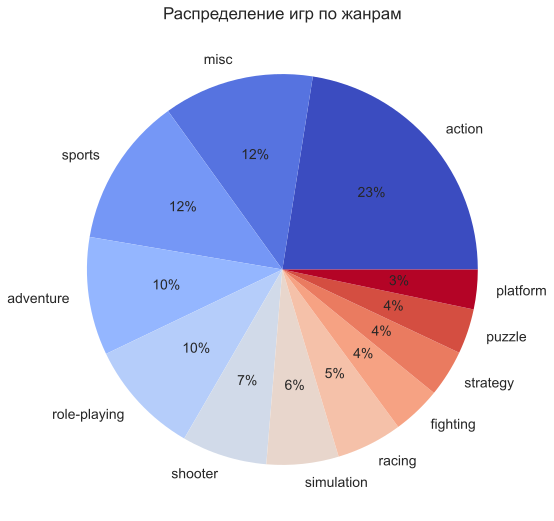

In [78]:
# посмотрим на распределение игр по жанрам
sales_genre_actual.plot(kind = 'pie',
                        y ='games_count',
                        label = '',
                        cmap = 'coolwarm',
                        autopct = '%1.0f%%',
                        figsize = (9, 9),
                        legend = None)               
plt.title('Распределение игр по жанрам')
plt.show()

Наибольшее количество игр в актуальный период вышло в жанре "action" (23%), наименьшее - в жанре "platform" (3%).

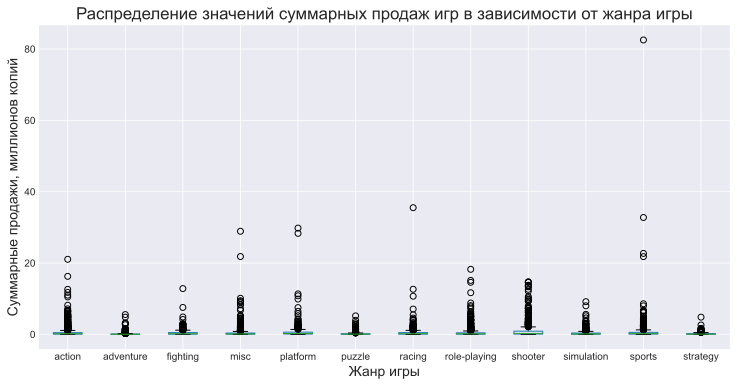

In [79]:
# посмотрим на распределение значений суммарных продаж игр по жанрам
games_actual.boxplot('total_sales',
                     by = 'genre',
                     fontsize = 10)
plt.xlabel('Жанр игры')
plt.ylabel('Суммарные продажи, миллионов копий')
plt.title('Распределение значений суммарных продаж игр в зависимости от жанра игры')
plt.suptitle('')
plt.show()

В большинстве жанров имеются игры, суммарные продажи по которым выбиваются за пределы 1,5 межквартильных размахов. Обращает на себя внимание игра в жанре "sports" с суммарными продажами свыше 80 миллионов копий.

In [80]:
# посмотрим на игру с суммарными продажами свыше 80 миллионов копий
games_actual.query('total_sales > 80')

name platform  year_of_release   genre  na_sales  eu_sales  jp_sales  \
0  wii sports      wii             2006  sports     41.36     28.96      3.77   

   other_sales  critic_score  user_score rating  total_sales  
0         8.45          76.0         8.0      e        82.54

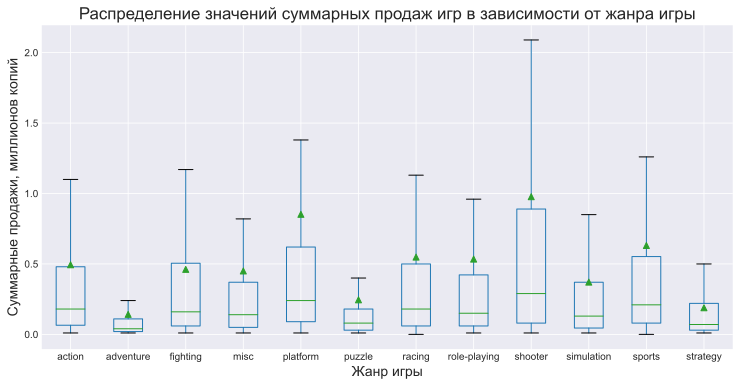

In [81]:
# посмотрим на распределение значений суммарных продаж игр по жанрам без выбросов
games_actual.boxplot('total_sales',
                     by = 'genre',
                     fontsize = 10,
                     showfliers = False,
                     showmeans = True)
plt.xlabel('Жанр игры')
plt.ylabel('Суммарные продажи, миллионов копий')
plt.title('Распределение значений суммарных продаж игр в зависимости от жанра игры')
plt.suptitle('')
plt.show()

Во всех жанрах наблюдается превышение среднего арифметического значения над медианным и скос распределения данных вправо, что свидетельствует о значительном количестве игр с небольшими суммарными продажами.

In [82]:
# отсортируем таблицу по суммарным продажам
sales_genre_actual = sales_genre_actual.sort_values(by = 'total_sales',
                                                    ascending = False)
sales_genre_actual

games_count  total_sales
genre                                 
action               2231      1102.54
sports               1228       775.01
shooter               700       684.14
misc                 1233       555.18
role-playing          944       504.58
racing                540       296.29
platform              325       276.99
simulation            591       219.26
fighting              399       184.18
adventure             968       137.55
puzzle                369        90.56
strategy              384        72.64

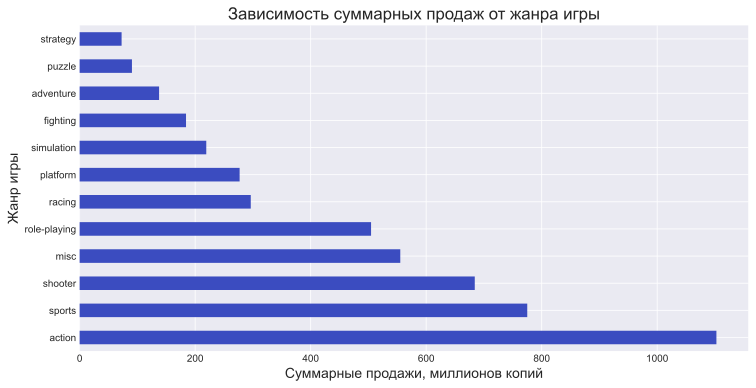

In [83]:
# посмотрим на зависимость суммарных продаж от жанра игры
sales_genre_actual['total_sales'].plot(kind = 'barh',
                                       cmap = 'coolwarm',
                                       fontsize = 10) 
plt.xlabel('Суммарные продажи, миллионов копий')
plt.ylabel('Жанр игры')
plt.grid(True)
plt.title('Зависимость суммарных продаж от жанра игры')
plt.show()

In [84]:
# посчитаем долю продаж игры "wii sports" от суммированных продаж всех игр в жанре "sports"
round(games_actual.query('total_sales > 80')['total_sales'].max()\
/ sales_genre_actual.loc[sales_genre_actual.index == 'sports']['total_sales'].max() * 100, 1)

10.7

Больше всего было продано игр в жанре "action" (более 1 миллиарда копий), в жанре "sports" было продано более 750 миллионов копий, однако 10,7% продаж составили продажи одной сверхпопулярной игры. Менее 100 миллионов копий игр было продано в жанрах "strategy" и "puzzle".

In [85]:
# посчитаем средние продажи одной игры по жанрам
sales_genre_actual['thousands_ of_copies_per_game'] = (sales_genre_actual['total_sales']\
                                                      / sales_genre_actual['games_count'] * 1000).round(1)
sales_genre_actual = sales_genre_actual.sort_values(by = 'thousands_ of_copies_per_game',
                                                    ascending = False)
sales_genre_actual

games_count  total_sales  thousands_ of_copies_per_game
genre                                                                
shooter               700       684.14                          977.3
platform              325       276.99                          852.3
sports               1228       775.01                          631.1
racing                540       296.29                          548.7
role-playing          944       504.58                          534.5
action               2231      1102.54                          494.2
fighting              399       184.18                          461.6
misc                 1233       555.18                          450.3
simulation            591       219.26                          371.0
puzzle                369        90.56                          245.4
strategy              384        72.64                          189.2
adventure             968       137.55                          142.1

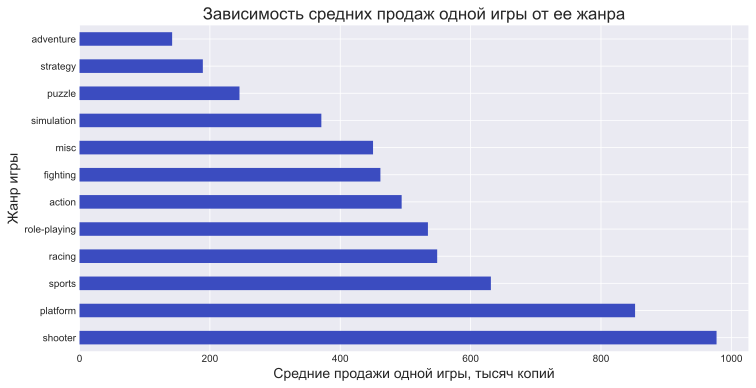

In [86]:
# посмотрим на зависимость средних продаж одной игры от ее жанра
sales_genre_actual['thousands_ of_copies_per_game'].plot(kind = 'barh',
                                                         cmap = 'coolwarm',
                                                         fontsize = 10) 
plt.xlabel('Средние продажи одной игры, тысяч копий')
plt.ylabel('Жанр игры')
plt.grid(True)
plt.title('Зависимость средних продаж одной игры от ее жанра')
plt.show()

Наибольшие средние продажи одной игры в жанре "shooter" (почти 1 миллион копий), в жанре "platform" в среднем было продано более 850 тысяч копий. Менее 200 тысяч копий в среднем на одну игру было продано в жанрах "adventure" и "strategy".

Таким образом самыми неперспективными с точки зрения суммарных продаж являются игры в жанрах "strategy", "adventure" и "puzzle". Копий этих игр было продано самое маленькое количество среди всех жанров, одновременно и средние продажи одной игры в этих жанрах наименьшие.   
В то же время наиболее перспективными являются игры в жанрах "shooter" и "sports". Они среди лидеров и по суммированым продажам, и по средним продажам одной игры.

### Вывод

1. В период с 1980 по 1990 годы игр выпускалось очень мало, однако все они являлись уникальными, т.е. выходили только на одной платформе. Суммарные продажи игр тоже были незначительны, однако, среднее количество проданных копий одной игры было большим. С 1990 по 2000 годы игр стало выпускаться больше, при этом доля уникальных игр продолжала оставаться достаточно высокой, а суммарные продажи начали расти. Период с 2000 по 2010 годы - расцвет рынка видеоигр, разнообразие, а также суммарные продажи которого, достигли своего пика в 2008 году. Доля же уникальных игр в этот период значительно снизилась. Период после 2010 года характерен резким снижением количества выпускаемых игр, в том числе уникальных (их количество вернулось к уровню конца 1990-х годов), сместив приоритеты к выпуску игр на разных платформах. В это же время также резко упали суммарные продажи, хотя средние продажи одной игры оставались на одном уровне.  Падение рынка видеоигр привело к тому, что суммарные продажи в 2015 году снизились до уровня начала 2000-х годов.  
2. Учитывая, что только в последние 10 лет к большому количеству выпускаемых игр добавилось разнообразие конкурирующих между собой платформ, срок "жизни" популярной платформы составляет около 10 лет, а также то, что имеющиеся данные за 2016 год неполные,  актуальным для дальнейшего исследования посчитали период с 2006 года по 2015 год.   
3. Потенциально прибыльные в 2017 году платформы:   
  * "3DS" и "Wii U" компании "Nintendo";    
  * "Playstation 4" и "PlayStation Vita" компании "Sony";  
  * "Xbox One" компании "Microsoft". 
4. Рост популярности пользователей наблюдается у платформ, выпущенных недавно: "Playstation 4" и "Xbox One".  На остальных перспективных платформах спрос на игры снижается.    
5. По всем перспективным платформам наблюдается превышение среднего арифметического значения над медианным и скос распределения данных вправо, что свидетельствует о значительном количестве игр с небольшими суммарными продажами.    
6. Зависимость суммарных продаж от оценок критиков на всех перспективных платформах (за исключением "PlayStation Vita") прямая, но слабая, а на платформе  "PlayStation Vita" прямая и очень слабая.    
7. Зависимость суммарных продаж от оценок пользователей имеется на платформах "3DS" и "Wii U" (прямая и слабая).   
8. Анализ данных по всем перспективным платформам в целом показал наличие зависимости суммарных продаж от оценок критиков  (прямая, но слабая) и отсутствие  зависимости суммарных продаж от оценок пользователей.    
9. Наибольшее количество игр в актуальный период вышло в жанре "action", наименьшее - в жанре "platform".     
10. Во всех жанрах наблюдается превышение среднего арифметического значения над медианным и скос распределения данных вправо, что свидетельствует о значительном количестве игр с небольшими суммарными продажами.   
11. Больше всего было продано игр в жанрах "action" и "sports", меньше всего - в жанрах "strategy" и "puzzle".    
12. Наибольшие средние продажи одной игры в жанрах "shooter" и "platform", наименьшие -  в жанрах "adventure" и "strategy".    
13. Самыми неперспективными с точки зрения продаж являются игры в жанрах "strategy", "adventure" и "puzzle". Этих игр было продано самое маленькое количество среди всех жанров, одновременно и средние продажи одной игры в этих жанрах наименьшие.   
14. Наиболее перспективными являются игры в жанрах "shooter" и "sports". Они среди лидеров и по суммированым продажам игр, и по средним продажам одной игры.

### Составление портрета пользователя
<a name="portrait"></a>

#### Самые популярные платформы

In [87]:
# создадим функцию для подсчета суммарных продаж по платформам
def sales_platform_popular(column):
    return games_actual.pivot_table(index = 'platform',
                                    values = column,
                                    aggfunc = 'sum')\
                       .sort_values(by = column,
                                    ascending = False)\
                       .reset_index()

In [88]:
# посчитаем суммарные продажи по регионам
(games_actual['na_sales'].sum(),
games_actual['eu_sales'].sum(),
games_actual['jp_sales'].sum())

(2358.4099999999994, 1455.0099999999998, 543.5600000000001)

In [89]:
# создадим таблицу с суммарными продажами в Северной Америке по платформам за актуальный период и их долями
na_sales_platform_popular = sales_platform_popular('na_sales')
na_sales_platform_popular['ratio_na_sales'] = (na_sales_platform_popular['na_sales']\
                                              / na_sales_platform_popular['na_sales'].sum() * 100).round(1)
na_sales_platform_popular

platform  na_sales  ratio_na_sales
0      x360    590.78            25.0
1       wii    493.95            20.9
2       ps3    390.93            16.6
3        ds    325.06            13.8
4       ps2    115.75             4.9
5       ps4     87.25             3.7
6       psp     82.36             3.5
7       3ds     78.97             3.3
8      xone     78.85             3.3
9        pc     43.96             1.9
10     wiiu     36.00             1.5
11      psv     12.32             0.5
12       gc      8.94             0.4
13       xb      8.01             0.3
14      gba      5.28             0.2
15       dc      0.00             0.0

In [90]:
# проверим суммарные продажи в Северной Америке
na_sales_platform_popular['na_sales'].sum()

2358.4099999999967

In [91]:
# выделим топ-5 наиболее популярных платформ в Северной Америке
top_na_sales_platform_popular = na_sales_platform_popular.head()
top_na_sales_platform_popular

platform  na_sales  ratio_na_sales
0     x360    590.78            25.0
1      wii    493.95            20.9
2      ps3    390.93            16.6
3       ds    325.06            13.8
4      ps2    115.75             4.9

В Северной Америке почти половину рынка видеоигр занимают игры на платформах "Xbox 360" с долей продаж 25% и "Wii" с долей продаж 20,9%.

In [92]:
# выделим продажи по перспективным платформам в Северной Америке
na_sales_platform_prospective = na_sales_platform_popular.loc[na_sales_platform_popular['platform'].isin(platform_prospective)]\
                                                         .reset_index(drop = True)
na_sales_platform_prospective

platform  na_sales  ratio_na_sales
0      ps4     87.25             3.7
1      3ds     78.97             3.3
2     xone     78.85             3.3
3     wiiu     36.00             1.5
4      psv     12.32             0.5

Доля продаж игр на перспективных платформах в Северной Америке в актуальном периоде незначительна.

In [93]:
# создадим таблицу с суммарными продажами в Европе по платформам за актуальный период и их долями
eu_sales_platform_popular = sales_platform_popular('eu_sales')
eu_sales_platform_popular['ratio_eu_sales'] = (eu_sales_platform_popular['eu_sales']\
                                              / eu_sales_platform_popular['eu_sales'].sum() * 100).round(1)
eu_sales_platform_popular

platform  eu_sales  ratio_eu_sales
0       ps3    327.57            22.5
1      x360    268.54            18.5
2       wii    261.37            18.0
3        ds    143.30             9.8
4       ps4    109.31             7.5
5        pc     98.55             6.8
6       3ds     59.13             4.1
7       psp     55.27             3.8
8       ps2     46.94             3.2
9      xone     41.96             2.9
10     wiiu     23.65             1.6
11      psv     12.68             0.9
12       xb      2.41             0.2
13       gc      2.40             0.2
14      gba      1.93             0.1
15       dc      0.00             0.0

In [94]:
# проверим суммарные продажи в Европе
eu_sales_platform_popular['eu_sales'].sum()

1455.0099999999932

In [95]:
# выделим топ-5 наиболее популярных платформ в Европе
top_eu_sales_platform_popular = eu_sales_platform_popular.head()
top_eu_sales_platform_popular

platform  eu_sales  ratio_eu_sales
0      ps3    327.57            22.5
1     x360    268.54            18.5
2      wii    261.37            18.0
3       ds    143.30             9.8
4      ps4    109.31             7.5

В Европе наиболее популярны игры на платформах "Playstation 4" (доля продаж 22,5%), "Xbox 360" (доля продаж 18,5%) и "Wii" (доля продаж 18%).

In [96]:
# выделим продажи по перспективным платформам в Европе
eu_sales_platform_prospective = eu_sales_platform_popular.loc[eu_sales_platform_popular['platform'].isin(platform_prospective)]\
                                                         .reset_index(drop = True)
eu_sales_platform_prospective

platform  eu_sales  ratio_eu_sales
0      ps4    109.31             7.5
1      3ds     59.13             4.1
2     xone     41.96             2.9
3     wiiu     23.65             1.6
4      psv     12.68             0.9

Из перспективных платформ в Европе в топ-5 наиболее популярных платформ попала "Playstation 4" с долей продаж 7,5%.

In [97]:
# создадим таблицу с суммарными продажами в Японии по платформам за актуальный период и их долями
jp_sales_platform_popular = sales_platform_popular('jp_sales')
jp_sales_platform_popular['ratio_jp_sales'] = (jp_sales_platform_popular['jp_sales']\
                                              / jp_sales_platform_popular['jp_sales'].sum() * 100).round(1)
jp_sales_platform_popular

platform  jp_sales  ratio_jp_sales
0        ds    141.49            26.0
1       3ds     92.61            17.0
2       ps3     78.21            14.4
3       psp     71.13            13.1
4       wii     69.05            12.7
5       ps2     36.08             6.6
6       psv     18.28             3.4
7      wiiu     12.34             2.3
8      x360     12.04             2.2
9       ps4     10.22             1.9
10      gba      1.51             0.3
11     xone      0.33             0.1
12       gc      0.21             0.0
13       dc      0.06             0.0
14       pc      0.00             0.0
15       xb      0.00             0.0

In [98]:
# проверим суммарные продажи в Японии
jp_sales_platform_popular['jp_sales'].sum()

543.5600000000009

In [99]:
# выделим топ-5 наиболее популярных платформ в Японии
top_jp_sales_platform_popular = jp_sales_platform_popular.head()
top_jp_sales_platform_popular

platform  jp_sales  ratio_jp_sales
0       ds    141.49            26.0
1      3ds     92.61            17.0
2      ps3     78.21            14.4
3      psp     71.13            13.1
4      wii     69.05            12.7

В Японии топ-5 наиболее популярных платформ возглавляют платформы "DS" (доля продаж 26%) и "3DS" (доля продаж 17%).

In [100]:
# выделим продажи по перспективным платформам в Японии
jp_sales_platform_prospective = jp_sales_platform_popular.loc[jp_sales_platform_popular['platform'].isin(platform_prospective)]\
                                                         .reset_index(drop = True)
jp_sales_platform_prospective

platform  jp_sales  ratio_jp_sales
0      3ds     92.61            17.0
1      psv     18.28             3.4
2     wiiu     12.34             2.3
3      ps4     10.22             1.9
4     xone      0.33             0.1

Из перспективных платформ в Японии в топ-5 наиболее популярных платформ (2-е место) вошла "3DS" с долей продаж 17%.

In [101]:
# сведем в одну таблицу всю информацию по наиболее популярным платформам
all_sales_platform_popular = top_na_sales_platform_popular.merge(top_eu_sales_platform_popular,
                                                                 on = 'platform',
                                                                 how ='outer')
all_sales_platform_popular = all_sales_platform_popular.merge(top_jp_sales_platform_popular,
                                                              on = 'platform',
                                                              how = 'outer')
all_sales_platform_popular

platform  na_sales  ratio_na_sales  eu_sales  ratio_eu_sales  jp_sales  \
0     x360    590.78            25.0    268.54            18.5       NaN   
1      wii    493.95            20.9    261.37            18.0     69.05   
2      ps3    390.93            16.6    327.57            22.5     78.21   
3       ds    325.06            13.8    143.30             9.8    141.49   
4      ps2    115.75             4.9       NaN             NaN       NaN   
5      ps4       NaN             NaN    109.31             7.5       NaN   
6      3ds       NaN             NaN       NaN             NaN     92.61   
7      psp       NaN             NaN       NaN             NaN     71.13   

   ratio_jp_sales  
0             NaN  
1            12.7  
2            14.4  
3            26.0  
4             NaN  
5             NaN  
6            17.0  
7            13.1

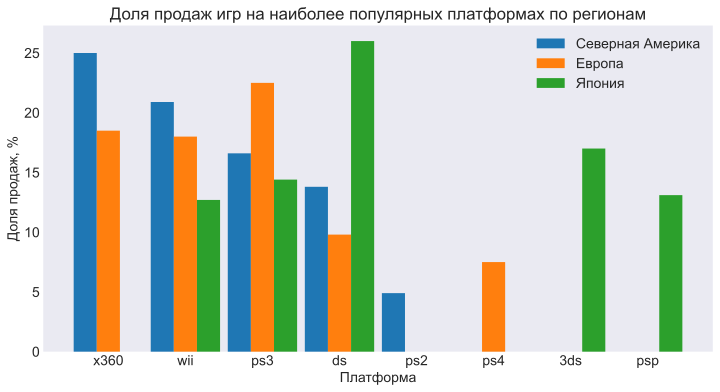

In [102]:
# посмотрим на долю продаж игр на популярных платформах по регионам
fig, ax = plt.subplots()
ax.set(title = 'Доля продаж игр на наиболее популярных платформах по регионам',
       xlabel = 'Платформа',
       ylabel='Доля продаж, %')
x = np.arange(1, 9) - 0.3
for column in all_sales_platform_popular[['ratio_na_sales','ratio_eu_sales', 'ratio_jp_sales']]:
    ax.bar(x, all_sales_platform_popular[column],
           width = 0.3)
    x = x + 0.3
ax.grid = True
ax.legend(['Северная Америка', 'Европа', 'Япония'], loc = 1)
plt.xticks(x - 0.6,
           all_sales_platform_popular['platform'])
plt.show()

Пользователи различных регионов предпочитают разные игровые платформы. Так, в Северной Америке наиболее популярны игры на платформе "Xbox 360" (доля продаж 25%), на этой же платформе достаточно популярны игры в Европе (18,5% от всех продаж по региону), а в Японии они даже не вошли в топ-5 наиболее популярных платформ. В Европе, где рынок видеоигр более разнообразен, лидирующие позиции занимают игры на платформе "Playstation 3" (22,5% от продаж по региону), на этой же платформе достаточно популярны игры в Северной Америке (доля продаж 16,6%) и в Японии (доля продаж 14,4%). В Японии наиболее продаваемыми являются игры от местного производителя "Nintendo" на платформе "DS" (доля продаж 26%) и "3DS" (доля продаж 17%), причем последняя не вошла в топ-5 наиболее популярных платформ ни в Северной Америке, ни в Европе. 

In [103]:
# сведем в одну таблицу всю информацию по перспективным платформам
all_sales_platform_prospective = na_sales_platform_prospective.merge(eu_sales_platform_prospective,
                                                                     on = 'platform',
                                                                     how ='outer')
all_sales_platform_prospective = all_sales_platform_prospective.merge(jp_sales_platform_prospective,
                                                                      on = 'platform',
                                                                      how = 'outer')
all_sales_platform_prospective

platform  na_sales  ratio_na_sales  eu_sales  ratio_eu_sales  jp_sales  \
0      ps4     87.25             3.7    109.31             7.5     10.22   
1      3ds     78.97             3.3     59.13             4.1     92.61   
2     xone     78.85             3.3     41.96             2.9      0.33   
3     wiiu     36.00             1.5     23.65             1.6     12.34   
4      psv     12.32             0.5     12.68             0.9     18.28   

   ratio_jp_sales  
0             1.9  
1            17.0  
2             0.1  
3             2.3  
4             3.4

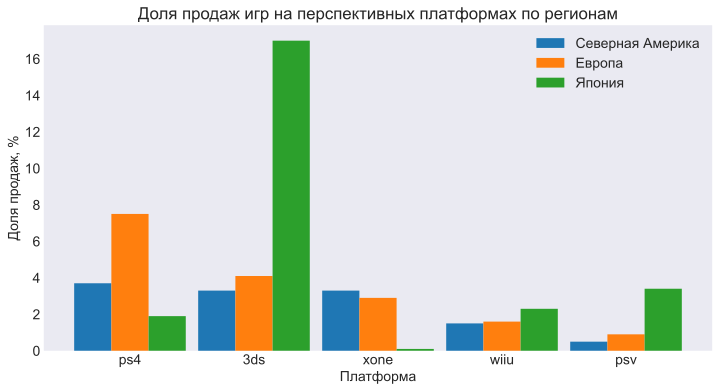

In [104]:
# посмотрим на долю продаж игр на перспективных платформах по регионам
fig, ax = plt.subplots()
ax.set(title = 'Доля продаж игр на перспективных платформах по регионам',
       xlabel = 'Платформа',
       ylabel='Доля продаж, %')
x = np.arange(1, 6) - 0.3
for column in all_sales_platform_prospective[['ratio_na_sales','ratio_eu_sales', 'ratio_jp_sales']]:
    ax.bar(x, all_sales_platform_prospective[column],
           width = 0.3)
    x = x + 0.3
ax.grid = True
ax.legend(['Северная Америка', 'Европа', 'Япония'], loc = 1)
plt.xticks(x - 0.6,
           all_sales_platform_prospective['platform'])
plt.show()

Выбранные ранее перспективные платформы занимают незначительную долю в суммарных продажах по регионам. Так, из всех перспективных платформ в топ-5 наиболее популярных платформ попали только "Playstation 4" в Европе (с долей продаж 7,5%) и уже упоминавшаяся  "3DS" в Японии (с долей продаж 17%).

#### Самые популярные жанры игры

In [105]:
# создадим функцию для подсчета суммарных продаж по жанрам игры
def sales_genre_popular(column):
    return games_actual.pivot_table(index = 'genre',
                                    values = column,
                                    aggfunc = 'sum')\
                       .sort_values(by = column,
                                    ascending = False)\
                       .reset_index()

In [106]:
# создадим таблицу с суммарными продажами в Северной Америке по жанрам игры за актуальный период и их долями
na_sales_genre_popular = sales_genre_popular('na_sales')
na_sales_genre_popular['ratio_na_sales'] = (na_sales_genre_popular['na_sales']\
                                           / na_sales_genre_popular['na_sales'].sum() * 100).round(1)
na_sales_genre_popular

genre  na_sales  ratio_na_sales
0         action    529.63            22.5
1         sports    392.00            16.6
2        shooter    359.41            15.2
3           misc    285.44            12.1
4   role-playing    193.82             8.2
5       platform    132.96             5.6
6         racing    132.24             5.6
7     simulation    108.08             4.6
8       fighting     92.62             3.9
9      adventure     60.57             2.6
10        puzzle     43.05             1.8
11      strategy     28.59             1.2

In [107]:
# проверим суммарные продажи в Северной Америке
na_sales_genre_popular['na_sales'].sum()

2358.4099999999935

In [108]:
# выделим топ-5 наиболее популярных жанров игры в Северной Америке
top_na_sales_genre_popular = na_sales_genre_popular.head()
top_na_sales_genre_popular

genre  na_sales  ratio_na_sales
0        action    529.63            22.5
1        sports    392.00            16.6
2       shooter    359.41            15.2
3          misc    285.44            12.1
4  role-playing    193.82             8.2

В Северной Америке наиболее популярны игры в жанрах "action" (доля продаж 22,5%), "sports" (доля продаж 16,6%) и "shooter" (доля продаж 15,2%).

In [109]:
# создадим таблицу с суммарными продажами в Европе по жанрам игры за актуальный период и их долями
eu_sales_genre_popular = sales_genre_popular('eu_sales')
eu_sales_genre_popular['ratio_eu_sales'] = (eu_sales_genre_popular['eu_sales']\
                                           / eu_sales_genre_popular['eu_sales'].sum() * 100).round(1)
eu_sales_genre_popular

genre  eu_sales  ratio_eu_sales
0         action    345.67            23.8
1         sports    240.51            16.5
2        shooter    225.16            15.5
3           misc    146.77            10.1
4         racing    111.65             7.7
5   role-playing    106.40             7.3
6       platform     80.71             5.5
7     simulation     68.49             4.7
8       fighting     41.34             2.8
9      adventure     36.60             2.5
10        puzzle     27.80             1.9
11      strategy     23.91             1.6

In [110]:
# проверим суммарные продажи в Европе
eu_sales_genre_popular['eu_sales'].sum()

1455.009999999994

In [111]:
# выделим топ-5 наиболее популярных жанров игры в Европе
top_eu_sales_genre_popular = eu_sales_genre_popular.head()
top_eu_sales_genre_popular

genre  eu_sales  ratio_eu_sales
0   action    345.67            23.8
1   sports    240.51            16.5
2  shooter    225.16            15.5
3     misc    146.77            10.1
4   racing    111.65             7.7

В Европе в топ-5 наиболее популярных жанров вошли "action" (доля продаж 23,8%), "sports" (доля продаж 16,5%) и "shooter" (доля продаж 15,5%).

In [112]:
# создадим таблицу с суммарными продажами в Японии по жанрам игры за актуальный период и их долями
jp_sales_genre_popular = sales_genre_popular('jp_sales')
jp_sales_genre_popular['ratio_jp_sales'] = (jp_sales_genre_popular['jp_sales']\
                                           / jp_sales_genre_popular['jp_sales'].sum() * 100).round(1)
jp_sales_genre_popular

genre  jp_sales  ratio_jp_sales
0   role-playing    163.97            30.2
1         action     95.01            17.5
2           misc     64.51            11.9
3         sports     48.33             8.9
4       platform     35.09             6.5
5      adventure     28.35             5.2
6       fighting     27.86             5.1
7     simulation     22.98             4.2
8        shooter     18.31             3.4
9       strategy     13.53             2.5
10        racing     13.19             2.4
11        puzzle     12.43             2.3

In [113]:
# проверим суммарные продажи в Японии
jp_sales_genre_popular['jp_sales'].sum()

543.5600000000012

In [114]:
# выделим топ-5 наиболее популярных жанров игры в Японии
top_jp_sales_genre_popular = jp_sales_genre_popular.head()
top_jp_sales_genre_popular

genre  jp_sales  ratio_jp_sales
0  role-playing    163.97            30.2
1        action     95.01            17.5
2          misc     64.51            11.9
3        sports     48.33             8.9
4      platform     35.09             6.5

Пользователи в Японии предпочитают игры в жанрах "role-playing" с долей продаж 30,2% и "action" с долей продаж 17,5%.

In [115]:
# сведем в одну таблицу всю информацию по наиболее популярным жанрам игры
all_sales_genre_popular = top_na_sales_genre_popular.merge(top_eu_sales_genre_popular,
                                                           on = 'genre',
                                                           how ='outer')
all_sales_genre_popular = all_sales_genre_popular.merge(top_jp_sales_genre_popular,
                                                        on = 'genre',
                                                        how = 'outer')
all_sales_genre_popular

genre  na_sales  ratio_na_sales  eu_sales  ratio_eu_sales  jp_sales  \
0        action    529.63            22.5    345.67            23.8     95.01   
1        sports    392.00            16.6    240.51            16.5     48.33   
2       shooter    359.41            15.2    225.16            15.5       NaN   
3          misc    285.44            12.1    146.77            10.1     64.51   
4  role-playing    193.82             8.2       NaN             NaN    163.97   
5        racing       NaN             NaN    111.65             7.7       NaN   
6      platform       NaN             NaN       NaN             NaN     35.09   

   ratio_jp_sales  
0            17.5  
1             8.9  
2             NaN  
3            11.9  
4            30.2  
5             NaN  
6             6.5

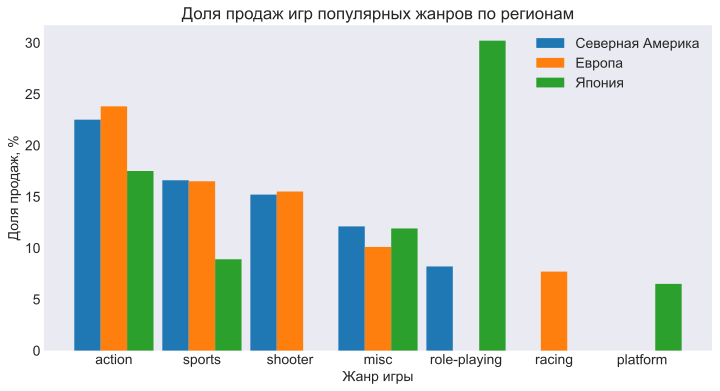

In [116]:
# посмотрим на долю продаж игр популярных жанров по регионам
fig, ax = plt.subplots()
ax.set(title = 'Доля продаж игр популярных жанров по регионам',
       xlabel = 'Жанр игры',
       ylabel='Доля продаж, %')
x = np.arange(1, 8) - 0.3
for column in all_sales_genre_popular[['ratio_na_sales','ratio_eu_sales', 'ratio_jp_sales']]:
    ax.bar(x, all_sales_genre_popular[column], width = 0.3)
    x = x + 0.3
ax.grid = True
ax.legend(['Северная Америка', 'Европа', 'Япония'], loc = 1)
plt.xticks(x - 0.6, all_sales_genre_popular['genre'])
plt.show()

В Северной Америке и Европе у пользователей практически одинаковые предпочтения в зависимости от жанра игры. В этих регионах более половины рынка занимают продажи в жанрах "action", "sports" и "shooter", лидирующие позиции при этом занимает жанр "action" с долей продаж соответственно 22,5% и 23,8%, который в Японии находится на 2-м месте (доля продаж 17,5%). В этом регионе, в свою очередь, львиную долю (почти треть) рынка видеоигр занимают игры в жанре "role-playing" (доля продаж 30,2%), который в Европе даже не попал в топ-5 наиболее популярных жанров. 	

#### Влияние рейтинга ESRB на продажи

In [117]:
# создадим функцию для подсчета суммарных продаж по рейтингам от организации ESRB
def sales_rating(column):
    return games_actual.pivot_table(index = 'rating',
                                    values = column,
                                    aggfunc = 'sum')\
                       .sort_values(by = column,
                                    ascending = False)\
                       .reset_index()

In [118]:
# создадим таблицу с суммарными продажами в Северной Америке по рейтингам от организации ESRB за актуальный период и их долями
na_sales_rating = sales_rating('na_sales')
na_sales_rating['ratio_na_sales'] = (na_sales_rating['na_sales']\
                                    / na_sales_rating['na_sales'].sum() * 100).round(1)
na_sales_rating

rating  na_sales  ratio_na_sales
0          e    792.96            33.6
1          m    560.90            23.8
2          t    417.79            17.7
3       e10+    318.65            13.5
4  no_rating    266.79            11.3
5         ec      1.32             0.1

In [119]:
# проверим суммарные продажи в Северной Америке
na_sales_rating['na_sales'].sum()

2358.4099999999853

In [120]:
# удалим строку с рейтингом от организации ESRB "EC" ввиду ее малой информативности
top_na_sales_rating = na_sales_rating.query('rating != "ec"')
top_na_sales_rating

rating  na_sales  ratio_na_sales
0          e    792.96            33.6
1          m    560.90            23.8
2          t    417.79            17.7
3       e10+    318.65            13.5
4  no_rating    266.79            11.3

В Северной Америке наиболее продаваемыми играми в актуальном периоде являются игры c рейтингом "E" ("для всех") - 33,6% от продаж, а также игры с рейтингом "M" ("для взрослых") - 23,8%.

In [121]:
# создадим таблицу с суммарными продажами в Европе по рейтингам от организации ESRB за актуальный период и их долями
eu_sales_rating = sales_rating('eu_sales')
eu_sales_rating['ratio_eu_sales'] = (eu_sales_rating['eu_sales']\
                                    / eu_sales_rating['eu_sales'].sum() * 100).round(1)
eu_sales_rating

rating  eu_sales  ratio_eu_sales
0          e    448.50            30.8
1          m    384.82            26.4
2          t    227.08            15.6
3  no_rating    220.15            15.1
4       e10+    174.46            12.0
5         ec      0.00             0.0

In [122]:
# проверим суммарные продажи в Европе
eu_sales_rating['eu_sales'].sum()

1455.0099999999907

In [123]:
# удалим строку с рейтингом от организации ESRB "EC" ввиду ее малой информативности
top_eu_sales_rating = eu_sales_rating.query('rating != "ec"')
top_eu_sales_rating

rating  eu_sales  ratio_eu_sales
0          e    448.50            30.8
1          m    384.82            26.4
2          t    227.08            15.6
3  no_rating    220.15            15.1
4       e10+    174.46            12.0

В Европе самые большие продажи у игр c рейтингом "E" ("для всех") - 30,8% от продаж, и игр с рейтингом "M" ("для взрослых") - 26,4%.

In [124]:
# создадим таблицу с суммарными продажами в Японии по рейтингам от организации ESRB за актуальный период и их долями
jp_sales_rating = sales_rating('jp_sales')
jp_sales_rating['ratio_jp_sales'] = (jp_sales_rating['jp_sales']\
                                    / jp_sales_rating['jp_sales'].sum() * 100).round(1)
jp_sales_rating

rating  jp_sales  ratio_jp_sales
0  no_rating    263.72            48.5
1          e    119.29            21.9
2          t     81.81            15.1
3          m     42.62             7.8
4       e10+     36.12             6.6
5         ec      0.00             0.0

In [125]:
# проверим суммарные продажи в Японии
jp_sales_rating['jp_sales'].sum()

543.5599999999962

In [126]:
# удалим строку с рейтингом от организации ESRB "EC" ввиду ее малой информативности
top_jp_sales_rating = jp_sales_rating.query('rating != "ec"')
top_jp_sales_rating

rating  jp_sales  ratio_jp_sales
0  no_rating    263.72            48.5
1          e    119.29            21.9
2          t     81.81            15.1
3          m     42.62             7.8
4       e10+     36.12             6.6

В Японии пользователи предпочитают игры с рейтингом "E" ("для всех") с долей продаж 21,9% и "T" ("для подростков") с долей продаж 15,1%. Кроме того, в этом регионе почти у половины игр пропущены значения рейтинга ESRB.

In [127]:
# сведем в одну таблицу всю информацию по рейтингам от организации ESRB
all_sales_rating = top_na_sales_rating.merge(top_eu_sales_rating,
                                             on = 'rating',
                                             how ='outer')
all_sales_rating = all_sales_rating.merge(top_jp_sales_rating,
                                          on = 'rating',
                                          how = 'outer')
all_sales_rating

rating  na_sales  ratio_na_sales  eu_sales  ratio_eu_sales  jp_sales  \
0          e    792.96            33.6    448.50            30.8    119.29   
1          m    560.90            23.8    384.82            26.4     42.62   
2          t    417.79            17.7    227.08            15.6     81.81   
3       e10+    318.65            13.5    174.46            12.0     36.12   
4  no_rating    266.79            11.3    220.15            15.1    263.72   

   ratio_jp_sales  
0            21.9  
1             7.8  
2            15.1  
3             6.6  
4            48.5

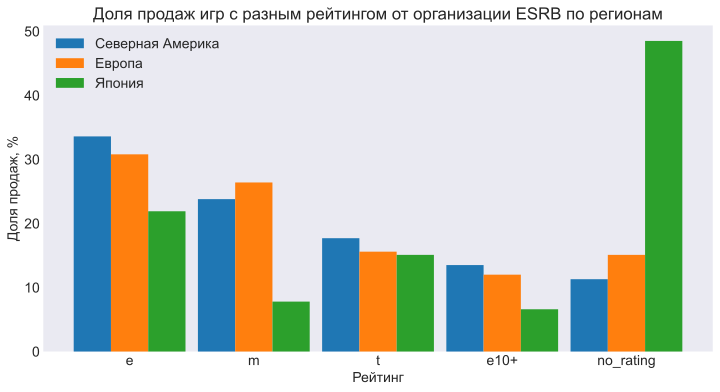

In [128]:
# посмотрим на долю продаж игр по рейтингам от организации ESRB
fig, ax = plt.subplots()
ax.set(title = 'Доля продаж игр с разным рейтингом от организации ESRB по регионам',
       xlabel = 'Рейтинг',
       ylabel='Доля продаж, %')
x = np.arange(1, 6) - 0.3
for column in all_sales_rating[['ratio_na_sales','ratio_eu_sales', 'ratio_jp_sales']]:
    ax.bar(x, all_sales_rating[column],
           width = 0.3)
    x = x + 0.3
ax.grid = True
ax.legend(['Северная Америка', 'Европа', 'Япония'], loc = 0)
plt.xticks(x - 0.6,
           all_sales_rating['rating'])
plt.show()

Структура продаж игр в зависимости от рейтинга от организации ESRB во всех регионах похожа - везде больше всего игр продается с рейтингом"E" ("для всех"). В то же время в Японии предпочтения пользователей все же несколько иные - в отличие от других регионов подростковые игры более популярны, чем игры для взрослых. Кроме того, обращает на себя внимание большое количество пропущенных значений рейтинга от организации ESRB в Японии.

#### Другие метрики по регионам

In [129]:
# создадим функцию для подсчета других метрик по регионам
def region_metrics(column):
    a = games_actual.loc[games_actual[column] > 0]['name'].count()
    b = games_actual[column].sum()
    c = (b / a * 1000).round(0)
    d = round(games_actual.loc[games_actual[column] > 0]['critic_score'].mean(), 0)
    e = round(games_actual.loc[games_actual[column] > 0]['user_score'].mean(), 1)
    f = {'number_of_games' : [a],
         'total_sales' : [b],
         'thousands_ of_copies_per_game' : [c],
         'critic_score_mean' : [d],
         'user_score_mean' : [e]}
    return pd.DataFrame(data = f)

In [130]:
# посчитаем другие метрики для пользователей Северной Америки
na_metrics = region_metrics('na_sales')
na_metrics

number_of_games  total_sales  thousands_ of_copies_per_game  \
0             6818      2358.41                          346.0   

   critic_score_mean  user_score_mean  
0               68.0              6.8

In [131]:
# приведем таблицу к другому формату
na_metrics = pd.melt(na_metrics, var_name = 'metric')
na_metrics

metric    value
0                number_of_games  6818.00
1                    total_sales  2358.41
2  thousands_ of_copies_per_game   346.00
3              critic_score_mean    68.00
4                user_score_mean     6.80

В Северной Америке в актуальном периоде было продано 6 818 игр, суммарные продажи составили 2 358,41 миллионов копий, в среднем продавалось 346 тысяч копий одной игры, средняя оценка критиков - 68 баллов, пользователей - 6,8 баллов.

In [132]:
# посчитаем другие метрики для пользователей Европы
eu_metrics = region_metrics('eu_sales')
eu_metrics

number_of_games  total_sales  thousands_ of_copies_per_game  \
0             5673      1455.01                          256.0   

   critic_score_mean  user_score_mean  
0               70.0              6.9

In [133]:
# приведем таблицу к другому формату
eu_metrics = pd.melt(eu_metrics, var_name = 'metric')
eu_metrics

metric    value
0                number_of_games  5673.00
1                    total_sales  1455.01
2  thousands_ of_copies_per_game   256.00
3              critic_score_mean    70.00
4                user_score_mean     6.90

В Европе в актуальном периоде было продано 5 673 игры, суммарные продажи составили 1 455,01 миллионов копий, в среднем продавалось 256 тысяч копий одной игры, средняя оценка критиков - 70 баллов, пользователей - 6,9 баллов.

In [134]:
# посчитаем другие метрики для пользователей Японии
jp_metrics = region_metrics('jp_sales')
jp_metrics

number_of_games  total_sales  thousands_ of_copies_per_game  \
0             3992       543.56                          136.0   

   critic_score_mean  user_score_mean  
0               74.0              7.3

In [135]:
# приведем таблицу к другому формату
jp_metrics = pd.melt(jp_metrics, var_name = 'metric')
jp_metrics

metric    value
0                number_of_games  3992.00
1                    total_sales   543.56
2  thousands_ of_copies_per_game   136.00
3              critic_score_mean    74.00
4                user_score_mean     7.30

В Японии в актуальном периоде было продано 3 992 игры, суммарные продажи составили 543,56 миллионов копий, в среднем продавалось 136 тысяч копий одной игры, средняя оценка критиков - 74 балла, пользователей - 7,3 баллов.

#### Портреты пользователей по регионам

In [136]:
# составим портрет пользователя из Северной Америки
na_users_portrait = pd.concat([na_metrics,
                               top_na_sales_platform_popular,
                               top_na_sales_genre_popular,
                               top_na_sales_rating],
                              axis = 1)
na_users_portrait

metric    value platform  na_sales  ratio_na_sales  \
0                number_of_games  6818.00     x360    590.78            25.0   
1                    total_sales  2358.41      wii    493.95            20.9   
2  thousands_ of_copies_per_game   346.00      ps3    390.93            16.6   
3              critic_score_mean    68.00       ds    325.06            13.8   
4                user_score_mean     6.80      ps2    115.75             4.9   

          genre  na_sales  ratio_na_sales     rating  na_sales  ratio_na_sales  
0        action    529.63            22.5          e    792.96            33.6  
1        sports    392.00            16.6          m    560.90            23.8  
2       shooter    359.41            15.2          t    417.79            17.7  
3          misc    285.44            12.1       e10+    318.65            13.5  
4  role-playing    193.82             8.2  no_rating    266.79            11.3

In [137]:
# составим портрет пользователя из Европы
eu_users_portrait = pd.concat([eu_metrics, top_eu_sales_platform_popular,
                               top_eu_sales_genre_popular,
                               top_eu_sales_rating],
                              axis = 1)
eu_users_portrait

metric    value platform  eu_sales  ratio_eu_sales  \
0                number_of_games  5673.00      ps3    327.57            22.5   
1                    total_sales  1455.01     x360    268.54            18.5   
2  thousands_ of_copies_per_game   256.00      wii    261.37            18.0   
3              critic_score_mean    70.00       ds    143.30             9.8   
4                user_score_mean     6.90      ps4    109.31             7.5   

     genre  eu_sales  ratio_eu_sales     rating  eu_sales  ratio_eu_sales  
0   action    345.67            23.8          e    448.50            30.8  
1   sports    240.51            16.5          m    384.82            26.4  
2  shooter    225.16            15.5          t    227.08            15.6  
3     misc    146.77            10.1  no_rating    220.15            15.1  
4   racing    111.65             7.7       e10+    174.46            12.0

In [138]:
# составим портрет пользователя из Японии
jp_users_portrait = pd.concat([jp_metrics,
                               top_jp_sales_platform_popular,
                               top_jp_sales_genre_popular,
                               top_jp_sales_rating],
                              axis = 1)
jp_users_portrait

metric    value platform  jp_sales  ratio_jp_sales  \
0                number_of_games  3992.00       ds    141.49            26.0   
1                    total_sales   543.56      3ds     92.61            17.0   
2  thousands_ of_copies_per_game   136.00      ps3     78.21            14.4   
3              critic_score_mean    74.00      psp     71.13            13.1   
4                user_score_mean     7.30      wii     69.05            12.7   

          genre  jp_sales  ratio_jp_sales     rating  jp_sales  ratio_jp_sales  
0  role-playing    163.97            30.2  no_rating    263.72            48.5  
1        action     95.01            17.5          e    119.29            21.9  
2          misc     64.51            11.9          t     81.81            15.1  
3        sports     48.33             8.9          m     42.62             7.8  
4      platform     35.09             6.5       e10+     36.12             6.6

Самый большой сегмент рынка видеоигр - продажи в Северной Америке. В этом регионе было продано наибольшее количество игр, а суммарные продажи больше, чем в Европе и Японии вместе взятых. Вследствие этого в Северной Америке самые большие средние продажи одной игры. Средние оценки критиков и пользователей продаваемых игр несколько выше в Японии, что говорит о том, что пользователи в этом регионе при приобретении игры в большей степени учитывают мнение критиков и других покупателей. 

### Вывод

1. Самый большой сегмент рынка видеоигр - продажи в Северной Америке. В этом регионе было продано наибольшее количество игр, а суммарные продажи больше, чем в Европе и Японии вместе взятых. Кроме этого в Северной Америке самые большие средние продажи одной игры. Средние оценки критиков и пользователей продаваемых игр несколько выше в Японии.   
2. Пользователи различных регионов предпочитают разные игровые платформы. Так, в Северной Америке наиболее популярны игры на платформе "Xbox 360", на этой же платформе достаточно популярны игры в Европе, а в Японии они даже не вошли в топ-5 наиболее популярных платформ. В Европе рынок видеоигр более разнообразен, лидирующие позиции в этом регионе занимают игры на платформе "Playstation 3", на этой же платформе достаточно популярны игры в Северной Америке и Японии. В Японии наиболее продаваемыми являются игры на платформах "DS" и "3DS", причем последняя не вошла в топ-5 наиболее популярных платформ ни в Северной Америке, ни в Европе. Выбранные ранее перспективные платформы занимают незначительную долю в суммарных продажах по регионам. Так, из выбранных ранее перспективных платформ в топ-5 наиболее популярных платформ попали только "Playstation 4" в Европе и "3DS" в Японии.       
3. В Северной Америке и Европе у пользователей практически одинаковые предпочтения в зависимости от жанра игры. В этих регионах более половины рынка занимают продажи в жанрах "action", "sports" и "shooter", лидирующие позиции при этом занимает жанр "action", который в Японии находится на 2-м месте. В этом регионе, в свою очередь, львиную долю рынка видеоигр занимают игры в жанре "role-playing", который в Европе даже не попал в топ-5 наиболее популярных жанров. 	
4. Структура продаж игр в зависимости от рейтинга от организации ESRB во всех регионах похожа - везде больше всего игр продается с рейтингом "E" ("для всех"). В то же время в Японии предпочтения пользователей все же несколько иные - в отличие от других регионов подростковые игры более популярны, чем игры для взрослых. 

### Проверка гипотез
<a name="hypothesis"></a>

In [139]:
# посмотрим сводную информацию таблицы за актуальный период
games_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9912 entries, 0 to 16561
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             9912 non-null   object 
 1   platform         9912 non-null   object 
 2   year_of_release  9912 non-null   int64  
 3   genre            9912 non-null   object 
 4   na_sales         9912 non-null   float64
 5   eu_sales         9912 non-null   float64
 6   jp_sales         9912 non-null   float64
 7   other_sales      9912 non-null   float64
 8   critic_score     4813 non-null   float64
 9   user_score       4739 non-null   float64
 10  rating           9912 non-null   object 
 11  total_sales      9912 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1006.7+ KB


В столбце `user_score` имеются пропущенные значения, от которых перед проверкой гипотез необходимо избавиться.

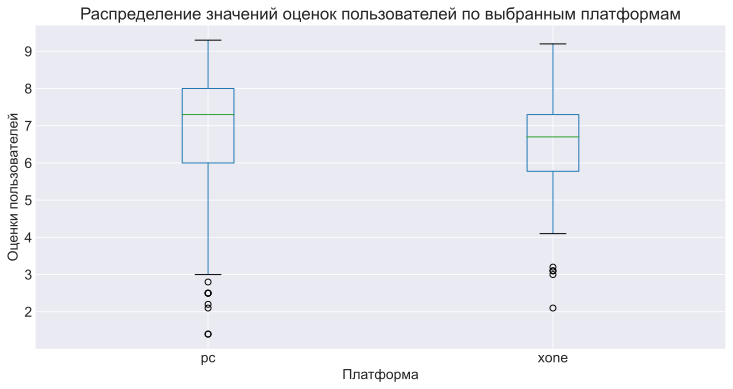

In [140]:
# посмотрим на распределение значений оценок пользователей по выбранным платформам
games_actual.query('platform == "xone" or platform == "pc"').boxplot('user_score',
                                                                     by = 'platform')
plt.xlabel('Платформа')
plt.ylabel('Оценки пользователей')
plt.title('Распределение значений оценок пользователей по выбранным платформам')
plt.suptitle('')
plt.show()

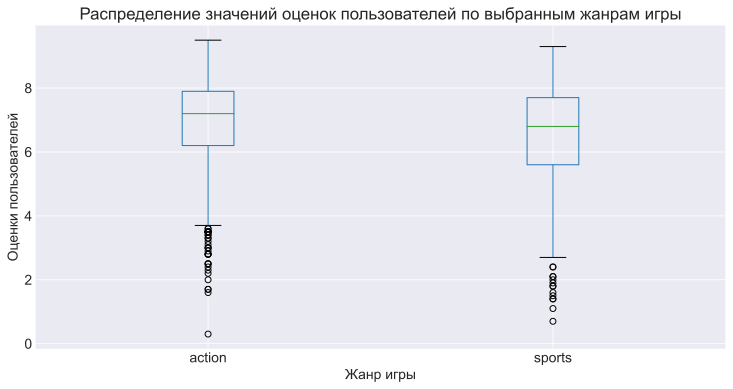

In [141]:
# посмотрим на распределение значений оценок пользователей по выбранным жанрам игры
games_actual.query('genre == "action" or genre == "sports"').boxplot('user_score',
                                                                     by = 'genre')
plt.xlabel('Жанр игры')
plt.ylabel('Оценки пользователей')
plt.title('Распределение значений оценок пользователей по выбранным жанрам игры')
plt.suptitle('')
plt.show()

В анализируемых выборках имеются выбивающиеся значения, от которых перед проверкой гипотез также необходимо избавиться.

In [142]:
# создадим функцию для расчета значений, отклоняющихся от среднего арифметического значения 
# на 3 величины стандартного отклонения
def filtered_data(column):
    std = np.std(column)
    mean = column. mean()
    filtered = (column >= mean - 3 * std) & (column <= mean + 3 * std)
    return filtered

In [143]:
# применим функцию для столбца оценок пользователей
filtred_user_score = filtered_data(games_actual['user_score'])

In [144]:
# создадим таблицу с данными по столбцу с оценками пользователей без выбросов
good_games_actual = games_actual.copy()
good_games_actual = games_actual[filtred_user_score]
good_games_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4681 entries, 0 to 16555
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             4681 non-null   object 
 1   platform         4681 non-null   object 
 2   year_of_release  4681 non-null   int64  
 3   genre            4681 non-null   object 
 4   na_sales         4681 non-null   float64
 5   eu_sales         4681 non-null   float64
 6   jp_sales         4681 non-null   float64
 7   other_sales      4681 non-null   float64
 8   critic_score     4238 non-null   float64
 9   user_score       4681 non-null   float64
 10  rating           4681 non-null   object 
 11  total_sales      4681 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 475.4+ KB


При удалении выбивающихся значений были удалены и пропущенные значения оценок пользователей.

In [145]:
# зададим критический уровень статистической значимости
alpha = 0.05

#### Проверка гипотезы №1

Так как гипотезы всегда формулируются так, чтобы использовать знак равенства, сформулируем их следующим образом:   
H0 - средние пользовательские рейтинги платформ "Xbox One" и "PC" не различаются;   
H1 - средние пользовательские рейтинги платформ "Xbox One" и "PC" различаются.      
Критический уровень статистической значимости alpha = 0.05.

In [146]:
# создадим отдельные таблицы для выбранных платформ
games_platform_xbox_one = good_games_actual.query('platform == "xone"')
games_platform_pc = good_games_actual.query('platform == "pc"')

Перед проверкой гипотез нужно оценить распределение значений наших выборок.

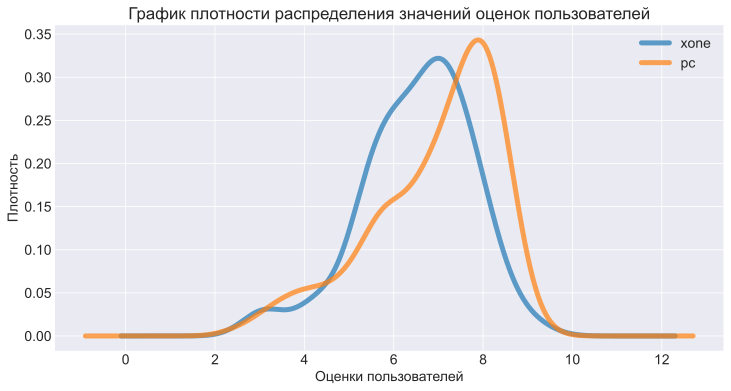

In [147]:
# построим график плотности распределения значений оценок пользователей для выбранных платформ
ax = games_platform_xbox_one.plot(kind = 'density',
                                  y = 'user_score',
                                  linewidth = 5,
                                  alpha = 0.7,
                                  label = 'xone')
games_platform_pc.plot(kind = 'density',
                       y = 'user_score',
                       linewidth = 5,
                       alpha = 0.7,
                       label = 'pc',
                       ax = ax,
                       grid = True,
                       legend = True)
plt.title('График плотности распределения значений оценок пользователей')
plt.xlabel('Оценки пользователей')
plt.ylabel('Плотность')
plt.show()

In [148]:
# посчитаем статистические показатели оценок пользователей по выбранным платформам
good_games_actual.query('platform == "xone" or platform == "pc"')\
                 .groupby('platform')\
                 .agg({'user_score':['mean', 'var','std', 'count']})\
                 .style.format("{:.2f}")

Для проверки гипотез будем использовать t-критерий Стьюдента, так как исходные данные имеют нормальное распределение. Кроме того, наши выборки независимы. Дисперсии совокупностей отличаются, следовательно дисперсию каждой выборки оценим для каждой по отдельности по значениям в ней самой.

In [149]:
# проверим предположение о верности гипотезы H0
results = st.ttest_ind(games_platform_xbox_one['user_score'],
                       games_platform_pc['user_score'],
                       equal_var = False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.002394209586189028
Отвергаем нулевую гипотезу


Полученное p-значение оказалось меньше уровня значимости в 5%, следовательно отвергаем нулевую гипотезу и принимаем альтернативную: средние двух генеральных совокупностей не равны между собой.

[Проверим](https://www.evanmiller.org/ab-testing/t-test.html#!6.91/1.43/577;6.52/1.23/115@95) полученный результат с использованием калькулятора Эвана Миллера.

#### Проверка гипотезы №2

Так как гипотезы всегда формулируются так, чтобы использовать знак равенства, сформулируем их следующим образом:   
H0 - средние пользовательские рейтинги жанров "Action" и "Sports" не различаются;   
H1 - средние пользовательские рейтинги жанров "Action" и "Sports" различаются.     
Критический уровень статистической значимости alpha = 0.05.

In [150]:
# создадим отдельные таблицы для выбранных жанров игры
games_genre_action = good_games_actual.query('genre == "action"')
games_genre_sports = good_games_actual.query('genre == "sports"')
games_genre_action.head()

name platform  year_of_release   genre  na_sales  eu_sales  \
16   grand theft auto v      ps3             2013  action      7.02      9.09   
23   grand theft auto v     x360             2013  action      9.66      5.14   
42   grand theft auto v      ps4             2014  action      3.96      6.31   
51  grand theft auto iv     x360             2008  action      6.76      3.07   
57  grand theft auto iv      ps3             2008  action      4.76      3.69   

    jp_sales  other_sales  critic_score  user_score rating  total_sales  
16      0.98         3.96          97.0         8.2      m        21.05  
23      0.06         1.41          97.0         8.1      m        16.27  
42      0.38         1.97          97.0         8.3      m        12.62  
51      0.14         1.03          98.0         7.9      m        11.00  
57      0.44         1.61          98.0         7.5      m        10.50

Перед проверкой гипотез нужно оценить распределение значений наших выборок.

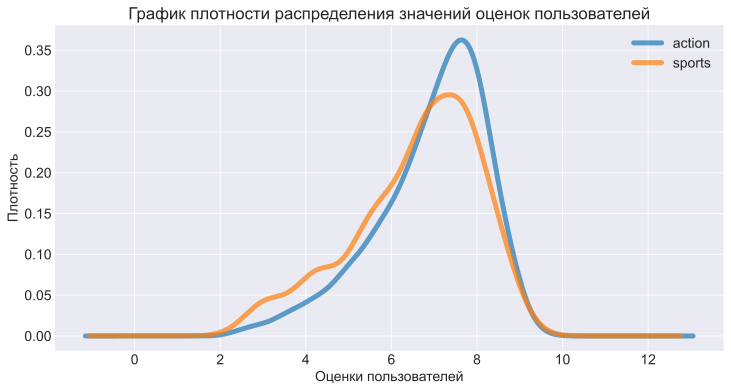

In [151]:
# построим график плотности распределения значений оценок пользователей для выбранных жанров игры
ax = games_genre_action.plot(kind = 'density',
                             y = 'user_score',
                             linewidth = 5,
                             alpha = 0.7,
                             label = 'action')
games_genre_sports.plot(kind = 'density',
                        y = 'user_score',
                        linewidth = 5,
                        alpha = 0.7,
                        label = 'sports',
                        ax = ax,
                        grid = True,
                        legend = True)
plt.title('График плотности распределения значений оценок пользователей')
plt.xlabel('Оценки пользователей')
plt.ylabel('Плотность')
plt.show()

In [152]:
# посчитаем статистические показатели оценок пользователей по выбранным жанрам игры
good_games_actual.query('genre == "action" or genre == "sports"')\
                 .groupby('genre')\
                 .agg({'user_score':['mean', 'var','std', 'count']})\
                 .style.format("{:.2f}")

Для проверки гипотез будем использовать t-критерий Стьюдента, так как исходные данные имеют нормальное распределение. Кроме того, наши выборки независимы. Дисперсии совокупностей отличаются, следовательно дисперсию каждой выборки оценим для каждой по отдельности по значениям в ней самой.

In [153]:
# проверим предположение о верности гипотезы H0
results = st.ttest_ind(games_genre_action['user_score'],
                       games_genre_sports['user_score'],
                       equal_var = False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.6970039422037546e-07
Отвергаем нулевую гипотезу


Полученное p-значение оказалось меньше уровня значимости в 5%, следовательно отвергаем нулевую гипотезу и принимаем альтернативную: средние двух генеральных совокупностей не равны между собой.

[Проверим](https://www.evanmiller.org/ab-testing/t-test.html#!6.93/1.3/1251;6.57/1.47/632@95) полученный результат с использованием калькулятора Эвана Миллера.

### Вывод

Результаты проверки гипотез:   
Средние пользовательские рейтинги платформ "Xbox One" и "PC" различаются. Установлены значимые различия между двумя выборками.  
Средние пользовательские рейтинги жанров "Action" и "Sports" различаются. Установлены значимые различия между двумя выборками. 

### Общий вывод
<a name="conclusion"></a>

1. В период с 1980 по 1990 годы игр выпускалось очень мало, однако все они являлись уникальными, т.е. выходили только на одной платформе. Суммарные продажи игр тоже были незначительны, однако, среднее количество проданных копий одной игры было большим. С 1990 по 2000 годы игр стало выпускаться больше, при этом доля уникальных игр продолжала оставаться достаточно высокой, а суммарные продажи начали расти. Период с 2000 по 2010 годы - расцвет рынка видеоигр, разнообразие, а также суммарные продажи которого, достигли своего пика в 2008 году. Доля же уникальных игр в этот период значительно снизилась. Период после 2010 года характерен резким снижением количества выпускаемых игр, в том числе уникальных (их количество вернулось к уровню конца 1990-х годов), сместив приоритеты к выпуску игр на разных платформах. В это же время также резко упали суммарные продажи, хотя средние продажи одной игры оставались на одном уровне.  Падение рынка видеоигр привело к тому, что суммарные продажи в 2015 году снизились до уровня начала 2000-х годов.     
2. Рост популярности пользователей наблюдается у платформ, выпущенных недавно: "Playstation 4" и "Xbox One".  На остальных перспективных платформах 3DS", "Wii U" и "PlayStation Vita" спрос на игры снижается, тем не менее, они потенциально могут принести прибыль в ближайшие несколько лет.    
3. Имеется незначительная прямая зависимость суммарных продаж на перспективных платформах от оценок критиков, зависимость же от оценок пользователей отсутствует.       
4. Наиболее перспективными являются игры в жанрах "shooter" и "sports". Они среди лидеров и по суммированым продажам игр, и по средним продажам одной игры. Самыми неперспективными с точки зрения продаж являются игры в жанрах "strategy", "adventure" и "puzzle". Этих игр было продано самое маленькое количество среди всех жанров, одновременно и средние продажи одной игры в этих жанрах наименьшие.      
5. Самый большой сегмент рынка видеоигр -  Северная Америка. В этом регионе было продано наибольшее количество игр, а суммарные продажи больше, чем в Европе и Японии вместе взятых. Кроме этого в Северной Америке самые большие средние продажи одной игры. Средние оценки критиков и пользователей продаваемых игр несколько выше в Японии.   
6. Пользователи различных регионов предпочитают разные игровые платформы. Так, в Северной Америке наиболее популярны игры на платформе "Xbox 360", а в Японии они даже не вошли в топ-5 наиболее популярных платформ. В Европе рынок видеоигр более разнообразен, лидирующие позиции в этом регионе занимают игры на платформе "Playstation 3". В Японии наиболее продаваемыми являются игры на платформах "DS" и "3DS", причем последняя вошла в топ-5 наиболее популярных платформ в этом регионе.       
7. В Северной Америке и Европе у пользователей практически одинаковые предпочтения в зависимости от жанра игры. В этих регионах более половины рынка занимают продажи в жанрах "action", "sports" и "shooter". В Японии, в свою очередь, львиную долю рынка видеоигр занимают игры в жанре "role-playing", который в Европе даже не попал в топ-5 наиболее популярных жанров. 	
8. Структура продаж игр в зависимости от рейтинга от организации ESRB во всех регионах похожа - везде больше всего игр продается с рейтингом "E" ("для всех"). В то же время в Японии предпочтения пользователей все же несколько иные - в отличие от других регионов подростковые игры более популярны, чем игры для взрослых.     
9. В результате проверки гипотез установлено, что средние пользовательские рейтинги платформ "Xbox One" и "PC", а также жанров "Action" и "Sports" различаются.

### Рекомендации
<a name="recommendations"></a>

1. Основное внимание акцентировать на самом большом сегменте рынка видеоигр -  Северной Америке. 
2. Учесть, что срок "жизни" игровой платформы составляет 8-10 лет, следовательно свести к минимуму предложение игр на платформах, для которых этот срок приближается к 6-8 годам.    
3. Увеличить долю предлагаемых игр на потенциально самых прибыльных платформах "Playstation 4" и "Xbox One".   
4. Не ориентироваться при предложении игр на пользовательские оценки, оценкам критиков не придавать большого значения, но принимать их во внимание.   
5. Увеличить предложение игр в жанрах "action", "sports" и "shooter", а также  игр с рейтингом от организации ESRB "E" ("для всех") и "M" ("для взрослых").
6. Учитывая специфику рынка видеоигр Японии при планировании рекламной кампании в этом регионе обратить внимание на игры на платформе "3DS", делая акцент на играх в жанре "role-playing" и играх с рейтингом от организации ESRB "T" ("для подростков").